<center><h1>Sun_Kaiyi_HW4</h1></center>
<br>
<br>

Name: Sun, Kaiyi
<br>
Github Username:KaiyiSss
<br>
USC ID: 6511379529

## 1. Time Series Classification Part 1: Feature Creation/Extraction (HW3 Rerun)

### (a) Obtain Data

####  Import packages

In [212]:
import pandas as pd
import glob
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
from sklearn.feature_selection import RFECV
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import SMOTE

#### Get the AReM Data Set

In [213]:
# get the file data
def getdataframes(files):
    dataframes = []
    for dataset in files:
        dataset = pd.read_csv(dataset, skiprows=4)
        dataset.columns =['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23' ,'var_rss23']
        dataframes.append(dataset)
    return dataframes
train_rows = []
test_rows = []

##### Bending 1

In [214]:
path_1 = '../data/AReM/bending1/*.csv'
files_1 = glob.glob(path_1)
df_bending1 = getdataframes(files_1)

for i in range(len(files_1)):
    if(i < 2):
        test_rows.append(i)
    else:
        train_rows.append(i)

total_files = len(files_1) # Counter for number of files added into test and train lists

##### Bending 2

In [215]:
path_2 = '../data/AReM/bending2/*.csv'
files_2 = glob.glob(path_2)
df_bending2 = getdataframes(files_2)

for i in range(len(files_2)):
    if(i < 2):
        test_rows.append(i+total_files)
    else:
        train_rows.append(i+total_files)

total_files += len(files_2)

##### Cycling

In [216]:
path_3 = '../data/AReM/cycling/*.csv'

files_3 = glob.glob(path_3)
df_cycling = getdataframes(files_3)

for i in range(len(files_3)):
    if(i < 3):
        test_rows.append(i+total_files)
    else:
        train_rows.append(i+total_files)

total_files += len(files_3)

##### Lying

In [217]:
path_4 = '../data/AReM/lying/*.csv'

files_4 = glob.glob(path_4)
df_lying = getdataframes(files_4)

for i in range(len(files_4)):
    if(i < 3):
        test_rows.append(i+total_files)
    else:
        train_rows.append(i+total_files)

total_files += len(files_4)

##### Sitting

In [218]:
path_5 = '../data/AReM/sitting/*.csv'
files_5 = glob.glob(path_5)
df_sitting = getdataframes(files_5)

for i in range(len(files_5)):
    if(i < 3):
        test_rows.append(i+total_files)
    else:
        train_rows.append(i+total_files)

total_files += len(files_5)

##### Standing

In [219]:
path_6 = '../data/AReM/standing/*.csv'
files_6 = glob.glob(path_6)
df_standing = getdataframes(files_6)

for i in range(len(files_6)):
    if(i < 3):
        test_rows.append(i+total_files)
    else:
        train_rows.append(i+total_files)

total_files += len(files_6)

##### Walking

In [220]:
path_7 = '../data/AReM/walking/*.csv'
files_7 = glob.glob(path_7)
df_walking = getdataframes(files_7)

for i in range(len(files_7)):
    if(i < 3):
        test_rows.append(i+total_files)
    else:
        train_rows.append(i+total_files)

total_files += len(files_7)

### (b) Splitting Data

#### Train data

In [221]:
# Instances of Train Data
train_instances = [df_bending1[2], df_bending1[3], df_bending1[4],  df_bending1[5],  df_bending1[6],df_bending2[2], df_bending2[3], df_bending2[4], df_bending2[5],
                    df_cycling[3], df_cycling[4], df_cycling[5],df_cycling[6], df_cycling[7], df_cycling[8],
                    df_cycling[9], df_cycling[10], df_cycling[11],df_cycling[12], df_cycling[13], df_cycling[14],df_lying[3], df_lying[4], df_lying[5],
                    df_lying[6], df_lying[7], df_lying[8],df_lying[9], df_lying[10], df_lying[11],df_lying[12], df_lying[13], df_lying[14],
                    df_sitting[3], df_sitting[4], df_sitting[5],df_sitting[6], df_sitting[7], df_sitting[8],df_sitting[9], df_sitting[10], df_sitting[11],
                    df_sitting[12], df_sitting[13], df_sitting[14],df_standing[3], df_standing[4], df_standing[5],df_standing[6], df_standing[7], df_standing[8],
                    df_standing[9], df_standing[10], df_standing[11],df_standing[12], df_standing[13], df_standing[14],df_walking[3], df_walking[4], df_walking[5],
                    df_walking[6], df_walking[7], df_walking[8], df_walking[9], df_walking[10], df_walking[11], df_walking[12], df_walking[13], df_walking[14]]

In [222]:
# train data from bending1
train_bending1 = pd.concat([df_bending1[2], df_bending1[3], df_bending1[4],  df_bending1[5],  df_bending1[6]])
# train data from bending2
train_bending2 = pd.concat([df_bending2[2], df_bending2[3], df_bending2[4], df_bending2[5]])
# train data from other datasets
# cycling
train_cycling = pd.concat([df_cycling[3], df_cycling[4], df_cycling[5],
                           df_cycling[6], df_cycling[7], df_cycling[8],
                           df_cycling[9], df_cycling[10], df_cycling[11],
                           df_cycling[12], df_cycling[13], df_cycling[14]])
# lying
train_lying = pd.concat([df_lying[3], df_lying[4], df_lying[5],
                         df_lying[6], df_lying[7], df_lying[8],
                         df_lying[9], df_lying[10], df_lying[11],
                         df_lying[12], df_lying[13], df_lying[14]])
# sitting
train_sitting = pd.concat([df_sitting[3], df_sitting[4], df_sitting[5],
                           df_sitting[6], df_sitting[7], df_sitting[8],
                           df_sitting[9], df_sitting[10], df_sitting[11],
                           df_sitting[12], df_sitting[13], df_sitting[14]])
# standing
train_standing = pd.concat([df_standing[3], df_standing[4], df_standing[5],
                            df_standing[6], df_standing[7], df_standing[8],
                            df_standing[9], df_standing[10], df_standing[11],
                            df_standing[12], df_standing[13], df_standing[14]])
# walking
train_walking = pd.concat([df_walking[3], df_walking[4], df_walking[5],
                           df_walking[6], df_walking[7], df_walking[8],
                           df_walking[9], df_walking[10], df_walking[11],
                           df_walking[12], df_walking[13], df_walking[14]])
# train data
train = pd.concat([train_bending1, train_bending2, train_cycling, train_lying, train_sitting, train_standing, train_walking])
train

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0         0      42.00       0.71      21.25       0.43      30.00       0.00
1       250      41.50       0.50      20.25       1.48      31.25       1.09
2       500      41.50       0.50      14.25       1.92      33.00       0.00
3       750      40.75       0.83      15.75       0.43      33.00       0.00
4      1000      40.00       0.71      20.00       2.74      32.75       0.43
..      ...        ...        ...        ...        ...        ...        ...
475  118750      31.50       1.66      12.50       3.20      14.25       4.44
476  119000      27.33       1.25      11.33       0.94      20.00       4.00
477  119250      37.80       7.68      14.20       2.48      17.25       0.83
478  119500      33.75       1.30      15.75       5.21      16.50       2.69
479  119750      32.67       3.09      18.67       0.47      14.00       3.16

[33119 rows x 7 columns]

#### Test data

In [223]:
# the dataframes belonging to test set
test_instances = [df_bending1[0], df_bending1[1], df_bending2[0], df_bending2[1], 
                df_cycling[0], df_cycling[1], df_cycling[2], df_lying[0], df_lying[1], df_lying[2],
                df_sitting[0], df_sitting[1], df_sitting[2], df_standing[0], df_standing[1], df_standing[2],
                df_walking[0], df_walking[1], df_walking[2]]

In [224]:
# test data from bending1
test_bending1 = pd.concat([df_bending1[0], df_bending1[1]])
# test data from bending2
test_bending2 = pd.concat([df_bending2[0], df_bending2[1]])
# cycling
test_cycling = pd.concat([df_cycling[0], df_cycling[1], df_cycling[2]])
# lying
test_lying = pd.concat([df_lying[0], df_lying[1], df_lying[2]])
# sitting
test_sitting = pd.concat([df_sitting[0], df_sitting[1], df_sitting[2]])
# standing
test_standing = pd.concat([df_standing[0], df_standing[1], df_standing[2]])
# walking
test_walking = pd.concat([df_walking[0], df_walking[1], df_walking[2]])
# test data
test = pd.concat([test_bending1, test_bending2, test_cycling, test_lying, test_sitting, test_standing, test_walking])
test

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0         0      39.25       0.43      22.75       0.43      33.75       1.30
1       250      39.25       0.43      23.00       0.00      33.00       0.00
2       500      39.25       0.43      23.25       0.43      33.00       0.00
3       750      39.50       0.50      23.00       0.71      33.00       0.00
4      1000      39.50       0.50      24.00       0.00      33.00       0.00
..      ...        ...        ...        ...        ...        ...        ...
475  118750      36.50       2.87      18.50       2.29      16.00       2.16
476  119000      35.00       9.70      18.67       0.94      18.33       2.05
477  119250      28.25       4.82      16.00       3.27      22.00       5.66
478  119500      32.25       8.26      12.50       4.15      15.25       2.77
479  119750      40.50       4.97      13.75       4.60      12.00       6.00

[9120 rows x 7 columns]

### (c) Feature Extraction

#### i. Research

Simple statistical features:
Means, Standard deviations, Skewness, Kurtosis, Maximum and Minimum values

Time serie analysis related features: Orders of the autoregressive (AR), integrated (I) and moving average (MA)

Reference: https://stats.stackexchange.com/questions/50807/features-for-time-series-classification

#### ii. Extraction

In [225]:
# Create column titles based on number of folds
def createColumnName(num_features, folds=1):
    column_names = ['mean','std', 'min', 'max', 'first_quartile_', 'third_quartile_','median']
    table_cols = []
    for i in range(1, (num_features*folds)+1):
        for name in column_names:
            table_cols.append(name + str(i))
    return table_cols

In [226]:
filter = ['mean', 'std', 'min', 'max', '25%', '75%'] # Values we want from describe method
columns_name = createColumnName(6)
columns_name.append('Labels') # For multi class classification
columns_name.append('BinaryLabel') # For binary classification

In [227]:
# generic function to create statistics table for each dataframe 
def createStatsTable(folder_dataframe, columns_name, label, binary):
    # Create statistics table for dataframe
    stats = []
    for dataframe in folder_dataframe:
        stats_table = dataframe.drop(columns=['time']).describe().transpose()[filter]
        stats_table['median'] = dataframe.median().transpose()
        stats.append(stats_table)
    # Create table rows
    rows = []
    for dataframe in stats:
        row = np.concatenate([np.array(dataframe.iloc[0,:]), np.array(dataframe.iloc[1,:]), np.array(dataframe.iloc[2,:]), np.array(dataframe.iloc[3,:]), np.array(dataframe.iloc[4,:]), np.array(dataframe.iloc[5,:])])
        # Add label to row
        row = np.append(row, label)
        row = np.append(row, binary)
        rows.append(row)
        
    return pd.DataFrame(rows, columns=columns_name)

##### Bending1 

In [228]:
bending1_table = createStatsTable(df_bending1, columns_name, 1, 1)

##### Bending2

In [229]:
bending2_table = createStatsTable(df_bending2, columns_name, 2, 1)

##### Cycling

In [230]:
cycling_table = createStatsTable(df_cycling,columns_name, 3, 0)

##### Lying 

In [231]:
lying_table = createStatsTable(df_lying,columns_name, 4, 0)

##### Sitting 

In [232]:
sitting_table = createStatsTable(df_sitting,columns_name, 5, 0)

##### Standing 

In [233]:
standing_table = createStatsTable(df_standing, columns_name,6, 0)

##### Walking

In [234]:
walking_table = createStatsTable(df_walking,columns_name, 7, 0)

In [235]:
final_table = pd.concat([bending1_table,bending2_table,cycling_table,lying_table,sitting_table,standing_table,walking_table], ignore_index=True)
final_table.iloc[:, :-2]

mean1      std1   min1   max1  first_quartile_1  third_quartile_1  \
0   40.624792  1.476967  37.25  45.00             39.25           42.0000   
1   42.812812  1.435550  38.00  45.67             42.00           43.6700   
2   43.954500  1.558835  35.00  47.40             43.00           45.0000   
3   42.179812  3.670666  33.00  47.75             39.15           45.0000   
4   41.678063  2.243490  33.00  45.75             41.33           42.7500   
..        ...       ...    ...    ...               ...               ...   
83  34.763333  4.742208  20.75  46.25             31.67           38.2500   
84  34.935812  4.645944  21.50  51.00             32.00           38.0625   
85  34.333042  4.948770  18.33  47.67             31.25           38.0000   
86  34.599875  4.731790  18.33  45.75             31.50           38.0000   
87  34.225875  4.441798  15.50  43.67             31.25           37.2500   

    median1     mean2      std2  min2  ...  first_quartile_5  \
0    40.500  0.358604  0.322605   0.0  ...           33.0000   
1    42.500  0.372437  0.289158   0.0  ...           32.0000   
2    44.330  0.426250  0.338690   0.0  ...           35.3625   
3    43.500  0.696042  0.630860   0.0  ...           30.4575   
4    41.750  0.535979  0.405469   0.0  ...           28.4575   
..      ...       ...       ...   ...  ...               ...   
83   35.290  4.223792  2.278004   0.0  ...           14.2500   
84   35.500  4.115750  2.335243   0.0  ...           14.2375   
85   34.750  4.396958  2.568680   0.0  ...           13.7500   
86   35.125  4.398833  2.538521   0.0  ...           14.0000   
87   34.750  4.354500  2.518991   0.0  ...           14.3300   

    third_quartile_5  median5     mean6      std6  min6   max6  \
0              36.00    35.00  0.570583  0.582915   0.0   1.92   
1              34.50    33.00  0.571083  0.601010   0.0   3.11   
2              36.50    36.00  0.493292  0.513506   0.0   1.79   
3              36.33    35.00  0.613521  0.524317   0.0   2.18   
4              31.25    30.00  0.383292  0.389164   0.0   1.79   
..               ...      ...       ...       ...   ...    ...   
83             18.33    16.25  3.288271  1.647528   0.0   9.39   
84             18.25    16.25  3.280021  1.700918   0.0  10.21   
85             18.00    16.00  3.261583  1.617290   0.0   8.01   
86             18.25    16.00  3.289542  1.680170   0.0   8.86   
87             18.25    16.25  3.479542  1.761146   0.0   9.42   

    first_quartile_6  third_quartile_6  median6  
0               0.00            1.3000    0.430  
1               0.00            1.3000    0.430  
2               0.00            0.9400    0.430  
3               0.00            1.0000    0.500  
4               0.00            0.5000    0.430  
..               ...               ...      ...  
83              2.05            4.3050    3.270  
84              2.12            4.5000    3.015  
85              2.05            4.3200    2.980  
86              2.12            4.2600    3.015  
87              2.24            4.5375    3.270  

[88 rows x 42 columns]

In [236]:
train_data = final_table.loc[train_rows]
train_data

mean1      std1   min1   max1  first_quartile_1  third_quartile_1  \
2   43.954500  1.558835  35.00  47.40             43.00           45.0000   
3   42.179812  3.670666  33.00  47.75             39.15           45.0000   
4   41.678063  2.243490  33.00  45.75             41.33           42.7500   
5   43.454958  1.386098  37.00  48.00             42.50           45.0000   
6   43.969125  1.618364  36.25  48.00             43.31           44.6700   
..        ...       ...    ...    ...               ...               ...   
83  34.763333  4.742208  20.75  46.25             31.67           38.2500   
84  34.935812  4.645944  21.50  51.00             32.00           38.0625   
85  34.333042  4.948770  18.33  47.67             31.25           38.0000   
86  34.599875  4.731790  18.33  45.75             31.50           38.0000   
87  34.225875  4.441798  15.50  43.67             31.25           37.2500   

    median1     mean2      std2  min2  ...  median5     mean6      std6  min6  \
2    44.330  0.426250  0.338690   0.0  ...    36.00  0.493292  0.513506   0.0   
3    43.500  0.696042  0.630860   0.0  ...    35.00  0.613521  0.524317   0.0   
4    41.750  0.535979  0.405469   0.0  ...    30.00  0.383292  0.389164   0.0   
5    43.250  0.378083  0.315566   0.0  ...    23.50  0.679646  0.622534   0.0   
6    44.500  0.413125  0.263111   0.0  ...    21.67  0.555312  0.487826   0.0   
..      ...       ...       ...   ...  ...      ...       ...       ...   ...   
83   35.290  4.223792  2.278004   0.0  ...    16.25  3.288271  1.647528   0.0   
84   35.500  4.115750  2.335243   0.0  ...    16.25  3.280021  1.700918   0.0   
85   34.750  4.396958  2.568680   0.0  ...    16.00  3.261583  1.617290   0.0   
86   35.125  4.398833  2.538521   0.0  ...    16.00  3.289542  1.680170   0.0   
87   34.750  4.354500  2.518991   0.0  ...    16.25  3.479542  1.761146   0.0   

     max6  first_quartile_6  third_quartile_6  median6  Labels  BinaryLabel  
2    1.79              0.00            0.9400    0.430     1.0          1.0  
3    2.18              0.00            1.0000    0.500     1.0          1.0  
4    1.79              0.00            0.5000    0.430     1.0          1.0  
5    5.26              0.43            0.8700    0.500     1.0          1.0  
6    2.96              0.00            0.8300    0.490     1.0          1.0  
..    ...               ...               ...      ...     ...          ...  
83   9.39              2.05            4.3050    3.270     7.0          0.0  
84  10.21              2.12            4.5000    3.015     7.0          0.0  
85   8.01              2.05            4.3200    2.980     7.0          0.0  
86   8.86              2.12            4.2600    3.015     7.0          0.0  
87   9.42              2.24            4.5375    3.270     7.0          0.0  

[69 rows x 44 columns]

In [237]:
test_data = final_table.loc[test_rows]
test_data

mean1      std1   min1   max1  first_quartile_1  third_quartile_1  \
0   40.624792  1.476967  37.25  45.00           39.2500           42.0000   
1   42.812812  1.435550  38.00  45.67           42.0000           43.6700   
7   24.562958  3.737514  12.75  51.00           23.1875           26.5000   
8   27.464604  3.583582   0.00  42.75           25.5000           30.0000   
13  37.177042  3.581301  24.25  45.00           34.5000           40.2500   
14  36.819521  3.900459  27.00  45.00           33.7500           40.2500   
15  36.541667  4.018922  27.00  44.33           33.2500           39.8125   
28  27.716375  1.442253  23.50  30.00           27.0000           29.0000   
29  27.716375  1.442253  23.50  30.00           27.0000           29.0000   
30  48.004167  0.032038  48.00  48.25           48.0000           48.0000   
43  42.363563  2.068247  33.25  48.00           42.0000           43.5000   
44  40.219271  2.741217  35.25  48.50           37.7500           42.5000   
45  43.884833  3.198894  28.50  48.25           42.0000           46.5000   
58  44.334729  2.476940  33.33  48.00           42.2500           46.5000   
59  42.419917  2.520129  36.00  45.80           41.3300           44.6175   
60  42.516958  2.195751  37.00  48.25           41.0000           44.5000   
73  34.227771  4.889576  19.33  43.50           30.5000           37.7500   
74  34.253521  4.940741  21.50  51.25           30.9375           37.7500   
75  33.586875  4.650935  19.50  45.33           30.2500           37.0000   

    median1     mean2      std2  min2  ...  median5     mean6      std6  min6  \
0     40.50  0.358604  0.322605   0.0  ...   35.000  0.570583  0.582915   0.0   
1     42.50  0.372437  0.289158   0.0  ...   33.000  0.571083  0.601010   0.0   
7     24.25  0.590833  0.837408   0.0  ...   23.750  0.700188  0.693720   0.0   
8     28.00  0.449708  0.767197   0.0  ...   18.000  1.122125  1.012342   0.0   
13    36.25  2.374208  1.601799   0.0  ...   20.000  2.921729  1.852600   0.0   
14    36.00  2.600146  1.821404   0.0  ...   17.415  2.887563  1.723094   0.0   
15    36.00  2.847958  1.892397   0.0  ...   16.750  3.225458  1.769758   0.0   
28    27.50  0.363687  0.394817   0.0  ...    8.750  0.734271  0.613688   0.0   
29    27.50  0.363687  0.394817   0.0  ...    8.750  0.735396  0.612834   0.0   
30    48.00  0.007167  0.055106   0.0  ...    9.000  0.641229  0.388372   0.0   
43    43.00  0.492563  0.403581   0.0  ...   13.125  1.034021  0.985627   0.0   
44    39.25  0.617479  0.485417   0.0  ...   15.250  1.057729  1.025925   0.0   
45    45.25  0.517354  0.394064   0.0  ...   15.875  1.354917  1.150883   0.0   
58    45.00  0.432958  0.370591   0.0  ...   14.750  0.933000  0.673609   0.0   
59    42.67  0.460562  0.387405   0.0  ...    9.750  1.226271  0.891988   0.0   
60    42.50  0.440687  0.349430   0.0  ...   15.000  0.977417  0.853280   0.0   
73    35.50  3.995729  2.271102   0.0  ...   16.670  3.394125  1.792090   0.0   
74    35.00  4.457896  2.387192   0.0  ...   15.750  3.500750  1.692378   0.0   
75    34.25  4.576562  2.461077   0.0  ...   16.000  3.259729  1.640243   0.0   

    max6  first_quartile_6  third_quartile_6  median6  Labels  BinaryLabel  
0   1.92             0.000            1.3000    0.430     1.0          1.0  
1   3.11             0.000            1.3000    0.430     1.0          1.0  
7   4.97             0.430            0.8700    0.500     2.0          1.0  
8   6.76             0.470            1.3000    0.830     2.0          1.0  
13  9.34             1.500            3.9000    2.500     3.0          0.0  
14  8.99             1.560            3.7700    2.525     3.0          0.0  
15  9.18             1.885            4.2625    2.870     3.0          0.0  
28  4.50             0.430            1.0000    0.710     4.0          0.0  
29  4.50             0.430            1.0000    0.710     4.0          0.0  
30  2.50             0.460            0.8300    0.500     4.0          0.0  

#### iii. Standard Deviation

In [238]:
final_table.iloc[:, :-2].describe().loc['std']

mean1               5.335718
std1                1.772153
min1                9.569975
max1                4.394362
first_quartile_1    6.153590
third_quartile_1    5.138925
median1             5.440054
mean2               1.574164
std2                0.884105
min2                0.000000
max2                5.062729
first_quartile_2    0.946386
third_quartile_2    2.125266
median2             1.412244
mean3               4.008380
std3                0.946710
min3                2.956462
max3                4.875137
first_quartile_3    4.220658
third_quartile_3    4.171628
median3             4.036396
mean4               1.166114
std4                0.458242
min4                0.000000
max4                2.183625
first_quartile_4    0.843620
third_quartile_4    1.552504
median4             1.145586
mean5               5.675593
std5                1.024898
min5                6.124001
max5                5.741238
first_quartile_5    6.096465
third_quartile_5    5.531720
median5       

90% bootsrap confidence interval

In [239]:
def calculateConfidenceInterval(column_val):
    # 0.1 alpha == 90%
    return bs.bootstrap(values= column_val, stat_func=bs_stats.std, alpha=0.1)

In [240]:
table_confidence = []
for i in range(len(final_table.columns[:-2])):
    table_confidence.append(calculateConfidenceInterval(np.array(final_table.iloc[:, i])))
table_confidence = pd.DataFrame(table_confidence, index = final_table.columns[:-2], columns= ['90% Confidence Intervals (Lower, Upper)'])
table_confidence.style

#### iv. Select Features

In [241]:
# Reference: https://machinelearningmastery.com/feature-selection-time-series-forecasting-python/
# load data
# split into input and output
X = final_table.iloc[:, :-2]
y = final_table.iloc[:, -2]
# fit random forest model
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)
# show importance scores
print(model.feature_importances_)

[0.00475907 0.00290103 0.00542098 0.00809547 0.00303623 0.02884568
 0.01092368 0.02432418 0.02302101 0.         0.00512856 0.02735718
 0.02669931 0.01591951 0.02654385 0.0095738  0.00819864 0.50858688
 0.00481765 0.04190162 0.00493094 0.00536192 0.00514143 0.
 0.00168848 0.01305498 0.00531779 0.00283642 0.01547279 0.00243062
 0.0292992  0.02352203 0.01993934 0.01343653 0.00440974 0.01867352
 0.00690063 0.         0.00609032 0.01127285 0.00816277 0.01600336]


In [242]:
features = []
start = 0
end = 7
for i in range(0, 6):
    features.append(model.feature_importances_[start:end])
    start = end
    end = end + 7
features = np.array(features)
averages_features = []
for i in range(0,7):
    averages_features.append(np.average(features[0][i] + features[1][i] +features[2][i] +features[3][i] +features[4][i] +features[5][i]))
averages_features

[0.09513532871171754,
 0.04996851709362346,
 0.042918823784520825,
 0.5531117382600375,
 0.07947822720741025,
 0.12436371473552418,
 0.05502365020716624]

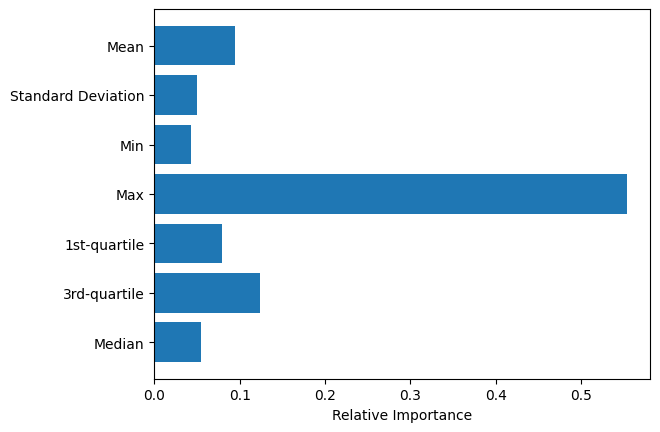

In [243]:
# Reference: https://machinelearningmastery.com/feature-selection-time-series-forecasting-python/
# plot importance scores
names = ['Mean', 'Standard Deviation','Min','Max','1st-quartile','3rd-quartile','Median']
ticks = [i for i in range(len(names))]
fig, ax = plt.subplots()
ax.barh(ticks, averages_features, align='center')
ax.set_yticks(ticks, labels=names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Relative Importance')
plt.show()

Reference: https://machinelearningmastery.com/feature-selection-time-series-forecasting-python/

Based on the RandomForestRegression model, the most relative features are Max, 3rd quartile and then Mean.

## 2. Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

#### i. Plots

In [244]:
chosen_features = ['mean','max','third_quartile_']
plot_columns = []
for i in [1,2,6]:
    for name in chosen_features:
        plot_columns.append(name + str(i))
plot_columns.append('BinaryLabel')

In [245]:
plot_data = final_table.loc[train_rows, plot_columns]
plot_data

mean1   max1  third_quartile_1     mean2   max2  third_quartile_2  \
2   43.954500  47.40           45.0000  0.426250   1.70            0.5000   
3   42.179812  47.75           45.0000  0.696042   3.00            1.1200   
4   41.678063  45.75           42.7500  0.535979   2.83            0.7100   
5   43.454958  48.00           45.0000  0.378083   1.58            0.5000   
6   43.969125  48.00           44.6700  0.413125   1.50            0.5000   
..        ...    ...               ...       ...    ...               ...   
83  34.763333  46.25           38.2500  4.223792  12.68            5.7225   
84  34.935812  51.00           38.0625  4.115750  12.21            5.6250   
85  34.333042  47.67           38.0000  4.396958  12.48            5.7450   
86  34.599875  45.75           38.0000  4.398833  15.37            5.7675   
87  34.225875  43.67           37.2500  4.354500  17.24            5.7650   

       mean6   max6  third_quartile_6  BinaryLabel  
2   0.493292   1.79            0.9400          1.0  
3   0.613521   2.18            1.0000          1.0  
4   0.383292   1.79            0.5000          1.0  
5   0.679646   5.26            0.8700          1.0  
6   0.555312   2.96            0.8300          1.0  
..       ...    ...               ...          ...  
83  3.288271   9.39            4.3050          0.0  
84  3.280021  10.21            4.5000          0.0  
85  3.261583   8.01            4.3200          0.0  
86  3.289542   8.86            4.2600          0.0  
87  3.479542   9.42            4.5375          0.0  

[69 rows x 10 columns]

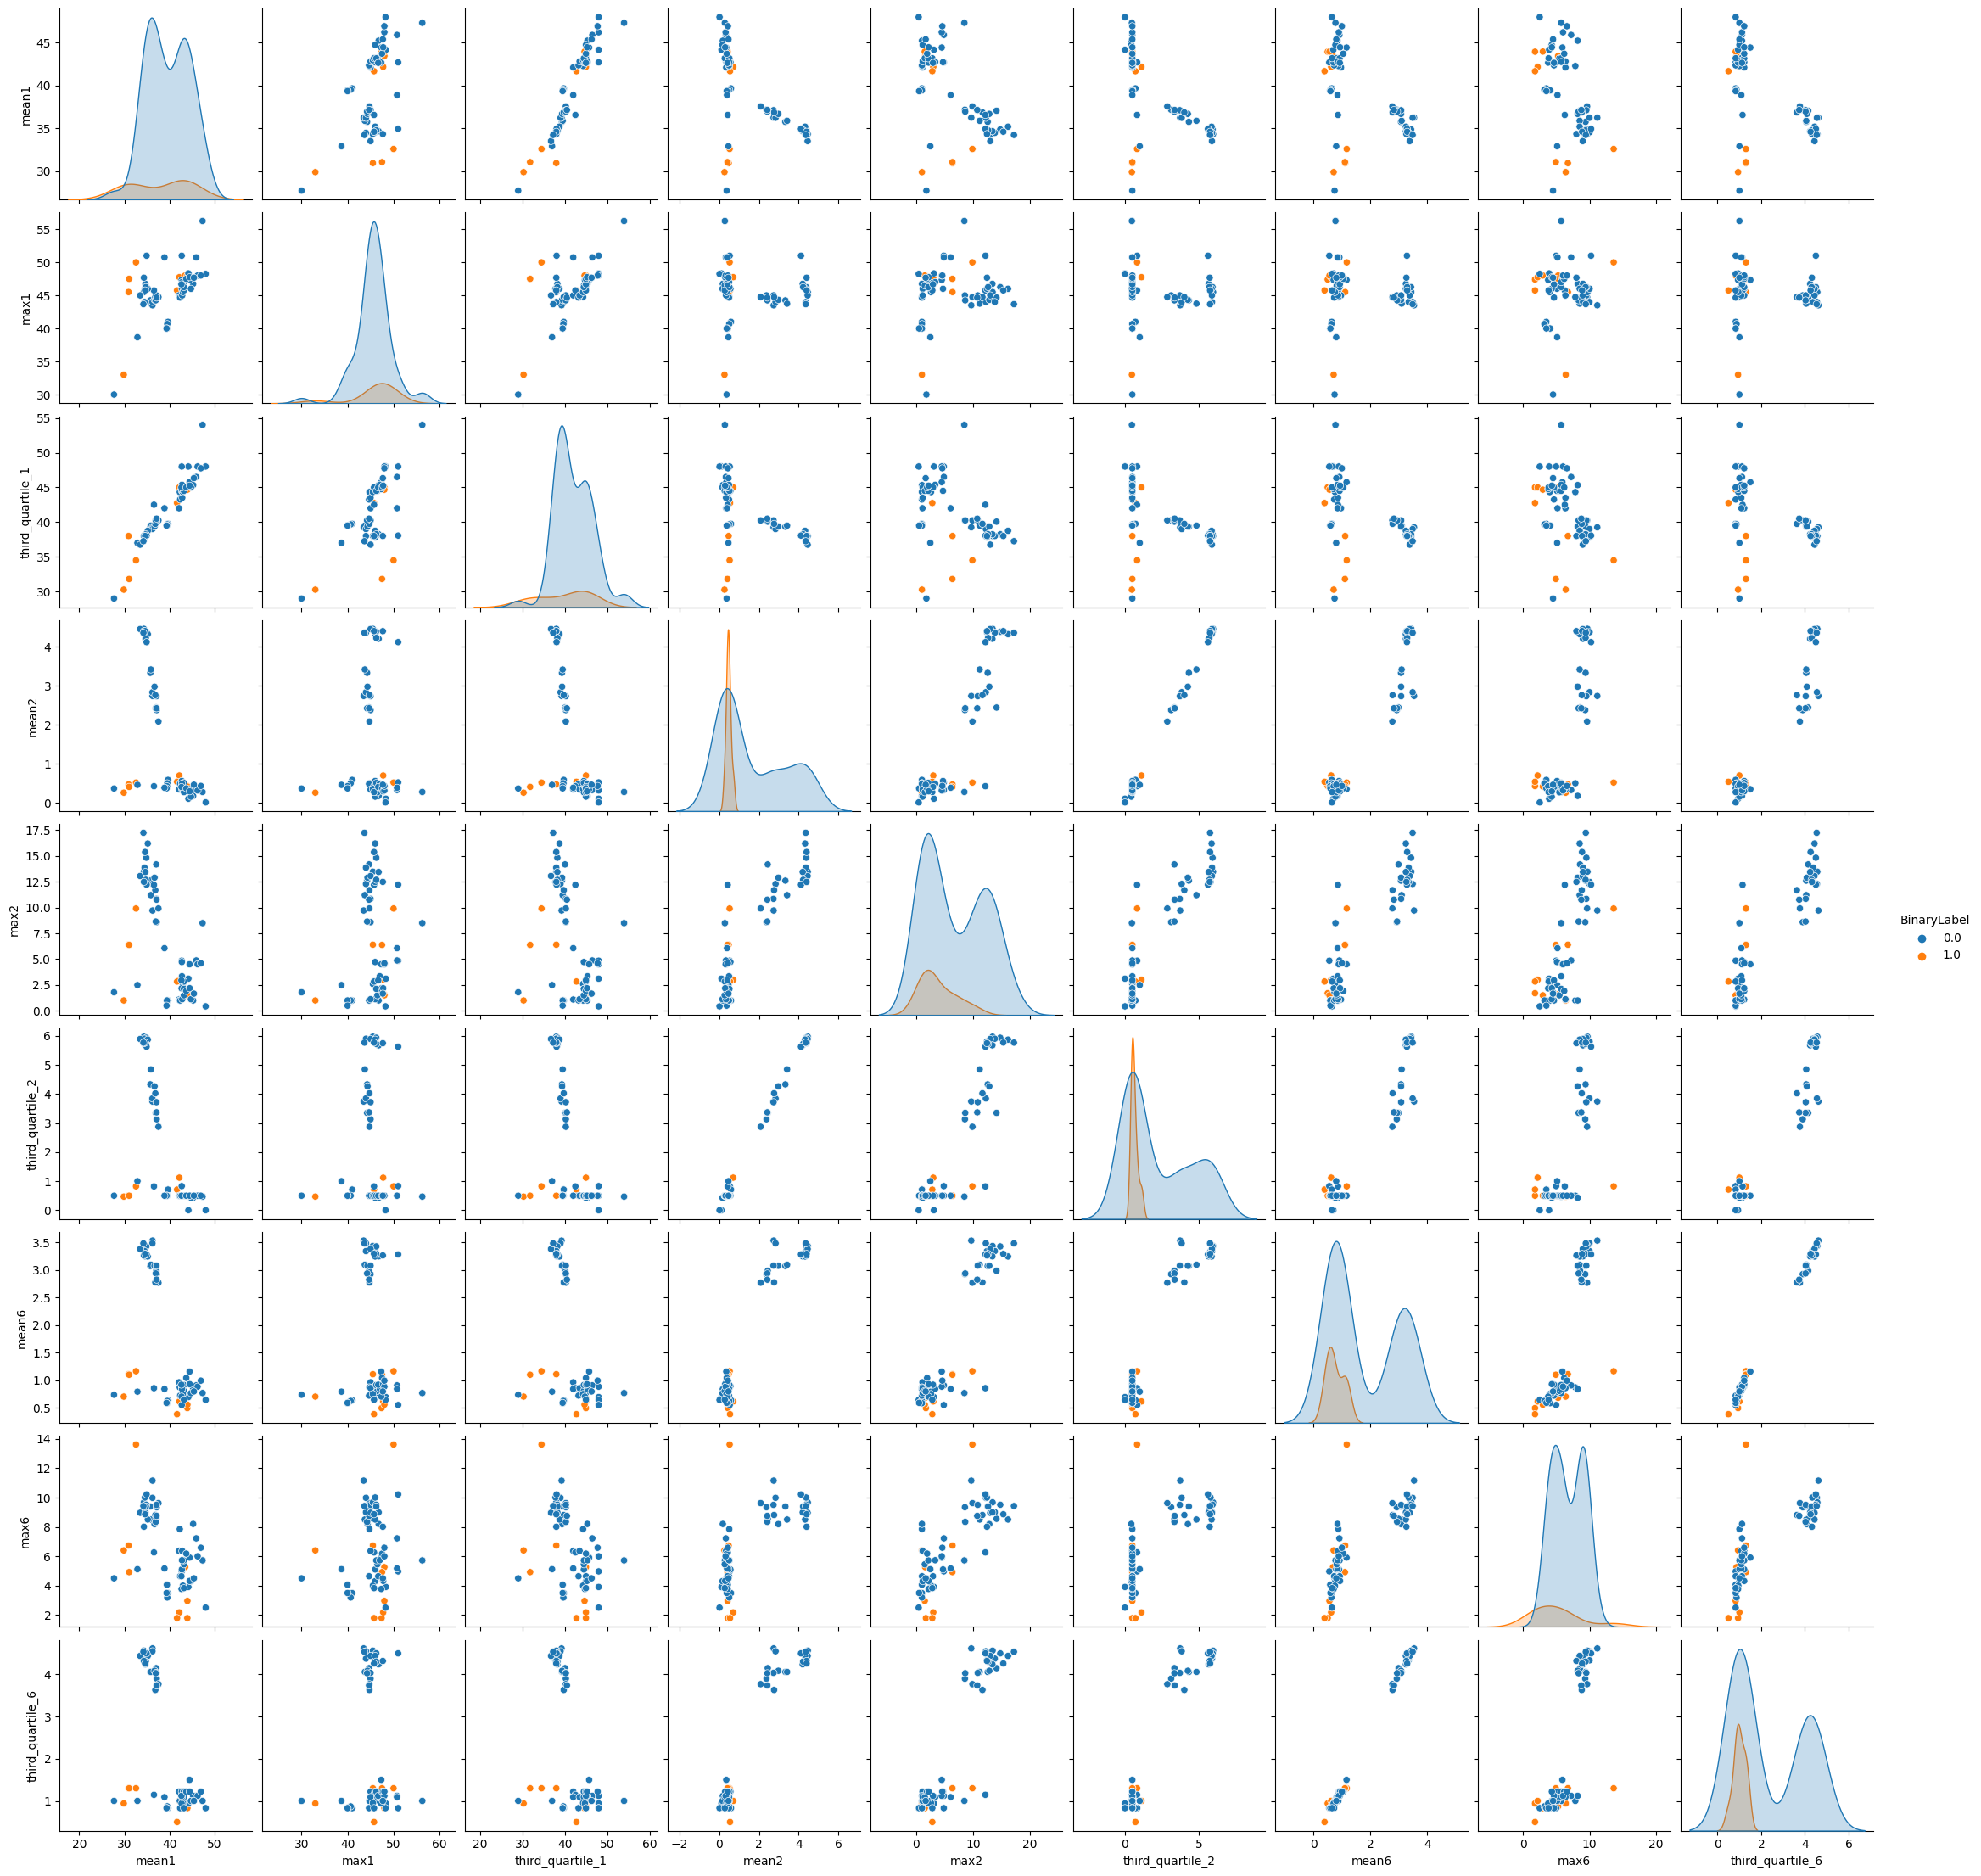

In [246]:
sns.pairplot(plot_data, hue='BinaryLabel')

#### ii. Splitted Plots

In [247]:
def splitTrainData(filedata, num_splits, filter):
    split_point = filedata.shape[0]//num_splits
    rows_to_join = []
    for i in range(num_splits):
        # split data based on midpoint or end of table whichever is more
        split_df = filedata.iloc[(i*split_point) : min((i+1)*split_point,filedata.shape[0]), :]
        partial_row = split_df.drop(columns=['time']).describe().transpose()[filter] # Drop the time column and get the columns that are in filter
        partial_row['median'] = split_df.median().transpose()
        rows_to_join.append(partial_row.values.flatten()) # Flatten the columns and rows into single row
    return np.concatenate(rows_to_join)

In [248]:
filter = ['mean', 'std', 'min', 'max', '25%', '75%']
cols = createColumnName(6, 2)
cols.append('BinaryLabel')

In [249]:
rows = []
index_count = 0
for instance in train_instances:
    row = splitTrainData(instance, 2, filter)
    row = np.append(row,  train_data.iloc[index_count, -1])
    rows.append(row)
    index_count += 1
two_split_plot = pd.DataFrame(rows, columns=cols)
two_split_plot

mean1      std1   min1   max1  first_quartile_1  third_quartile_1  \
0   44.057167  1.556971  36.50  46.50           43.2500           45.0000   
1   43.278875  3.473355  33.75  47.75           42.0000           45.2500   
2   41.621208  3.118644  33.00  45.75           39.6525           44.2500   
3   44.117042  1.359836  39.00  48.00           43.5000           45.0000   
4   43.486208  1.281976  36.67  45.00           42.3300           44.5000   
..        ...       ...    ...    ...               ...               ...   
64  34.966250  4.733014  22.33  46.00           32.0000           38.7500   
65  34.737042  4.276717  21.50  45.67           32.0000           37.7500   
66  33.886458  5.143776  18.33  45.00           30.4575           37.5000   
67  34.836458  4.869092  18.33  44.00           32.0000           38.6900   
68  34.329333  4.549837  23.00  42.75           31.3100           37.5425   

    median1     mean2      std2  min2  ...  third_quartile_11  median11  \
0    44.500  0.381042  0.329540   0.0  ...            36.2500    36.000   
1    45.000  0.673292  0.634285   0.0  ...            33.7500    30.415   
2    42.330  0.623083  0.489595   0.0  ...            30.5625    29.750   
3    45.000  0.250042  0.314099   0.0  ...            23.7500    23.250   
4    43.710  0.378667  0.284434   0.0  ...            23.5000    21.750   
..      ...       ...       ...   ...  ...                ...       ...   
64   35.500  4.207958  2.331940   0.0  ...            18.5000    16.000   
65   35.500  4.217333  2.337759   0.0  ...            18.2500    16.250   
66   34.375  4.332208  2.453111   0.0  ...            18.2500    15.875   
67   35.750  4.257750  2.512633   0.0  ...            18.2500    16.000   
68   34.710  4.315917  2.470266   0.0  ...            18.0000    16.000   

      mean12     std12  min12  max12  first_quartile_12  third_quartile_12  \
0   0.388333  0.478528   0.00   1.50             0.0000             0.7100   
1   0.586083  0.491873   0.00   2.18             0.0000             0.8700   
2   0.347500  0.363144   0.00   1.50             0.0000             0.5000   
3   0.543875  0.473445   0.00   4.06             0.4300             0.7100   
4   0.585750  0.487918   0.00   2.96             0.4225             0.8300   
..       ...       ...    ...    ...                ...                ...   
64  3.430208  1.647979   0.00   9.39             2.1700             4.4400   
65  3.225917  1.665326   0.00  10.21             2.0500             4.3500   
66  3.274750  1.670593   0.00   8.01             2.0500             4.4375   
67  3.409458  1.707089   0.47   8.84             2.1700             4.3450   
68  3.577833  1.794112   0.43   9.12             2.2900             4.7250   

    median12  BinaryLabel  
0      0.000          1.0  
1      0.470          1.0  
2      0.430          1.0  
3      0.500          1.0  
4      0.500          1.0  
..       ...          ...  
64     3.350          0.0  
65     3.085          0.0  
66     2.955          0.0  
67     3.110          0.0  
68     3.290          0.0  

[69 rows x 85 columns]

In [250]:
choosen_features = ['mean','max','third_quartile_']
split_plot_columns = []
for i in [1,2,6,7,8,12]:
    for name in chosen_features:
        split_plot_columns.append(name + str(i))
split_plot_columns.append('BinaryLabel')

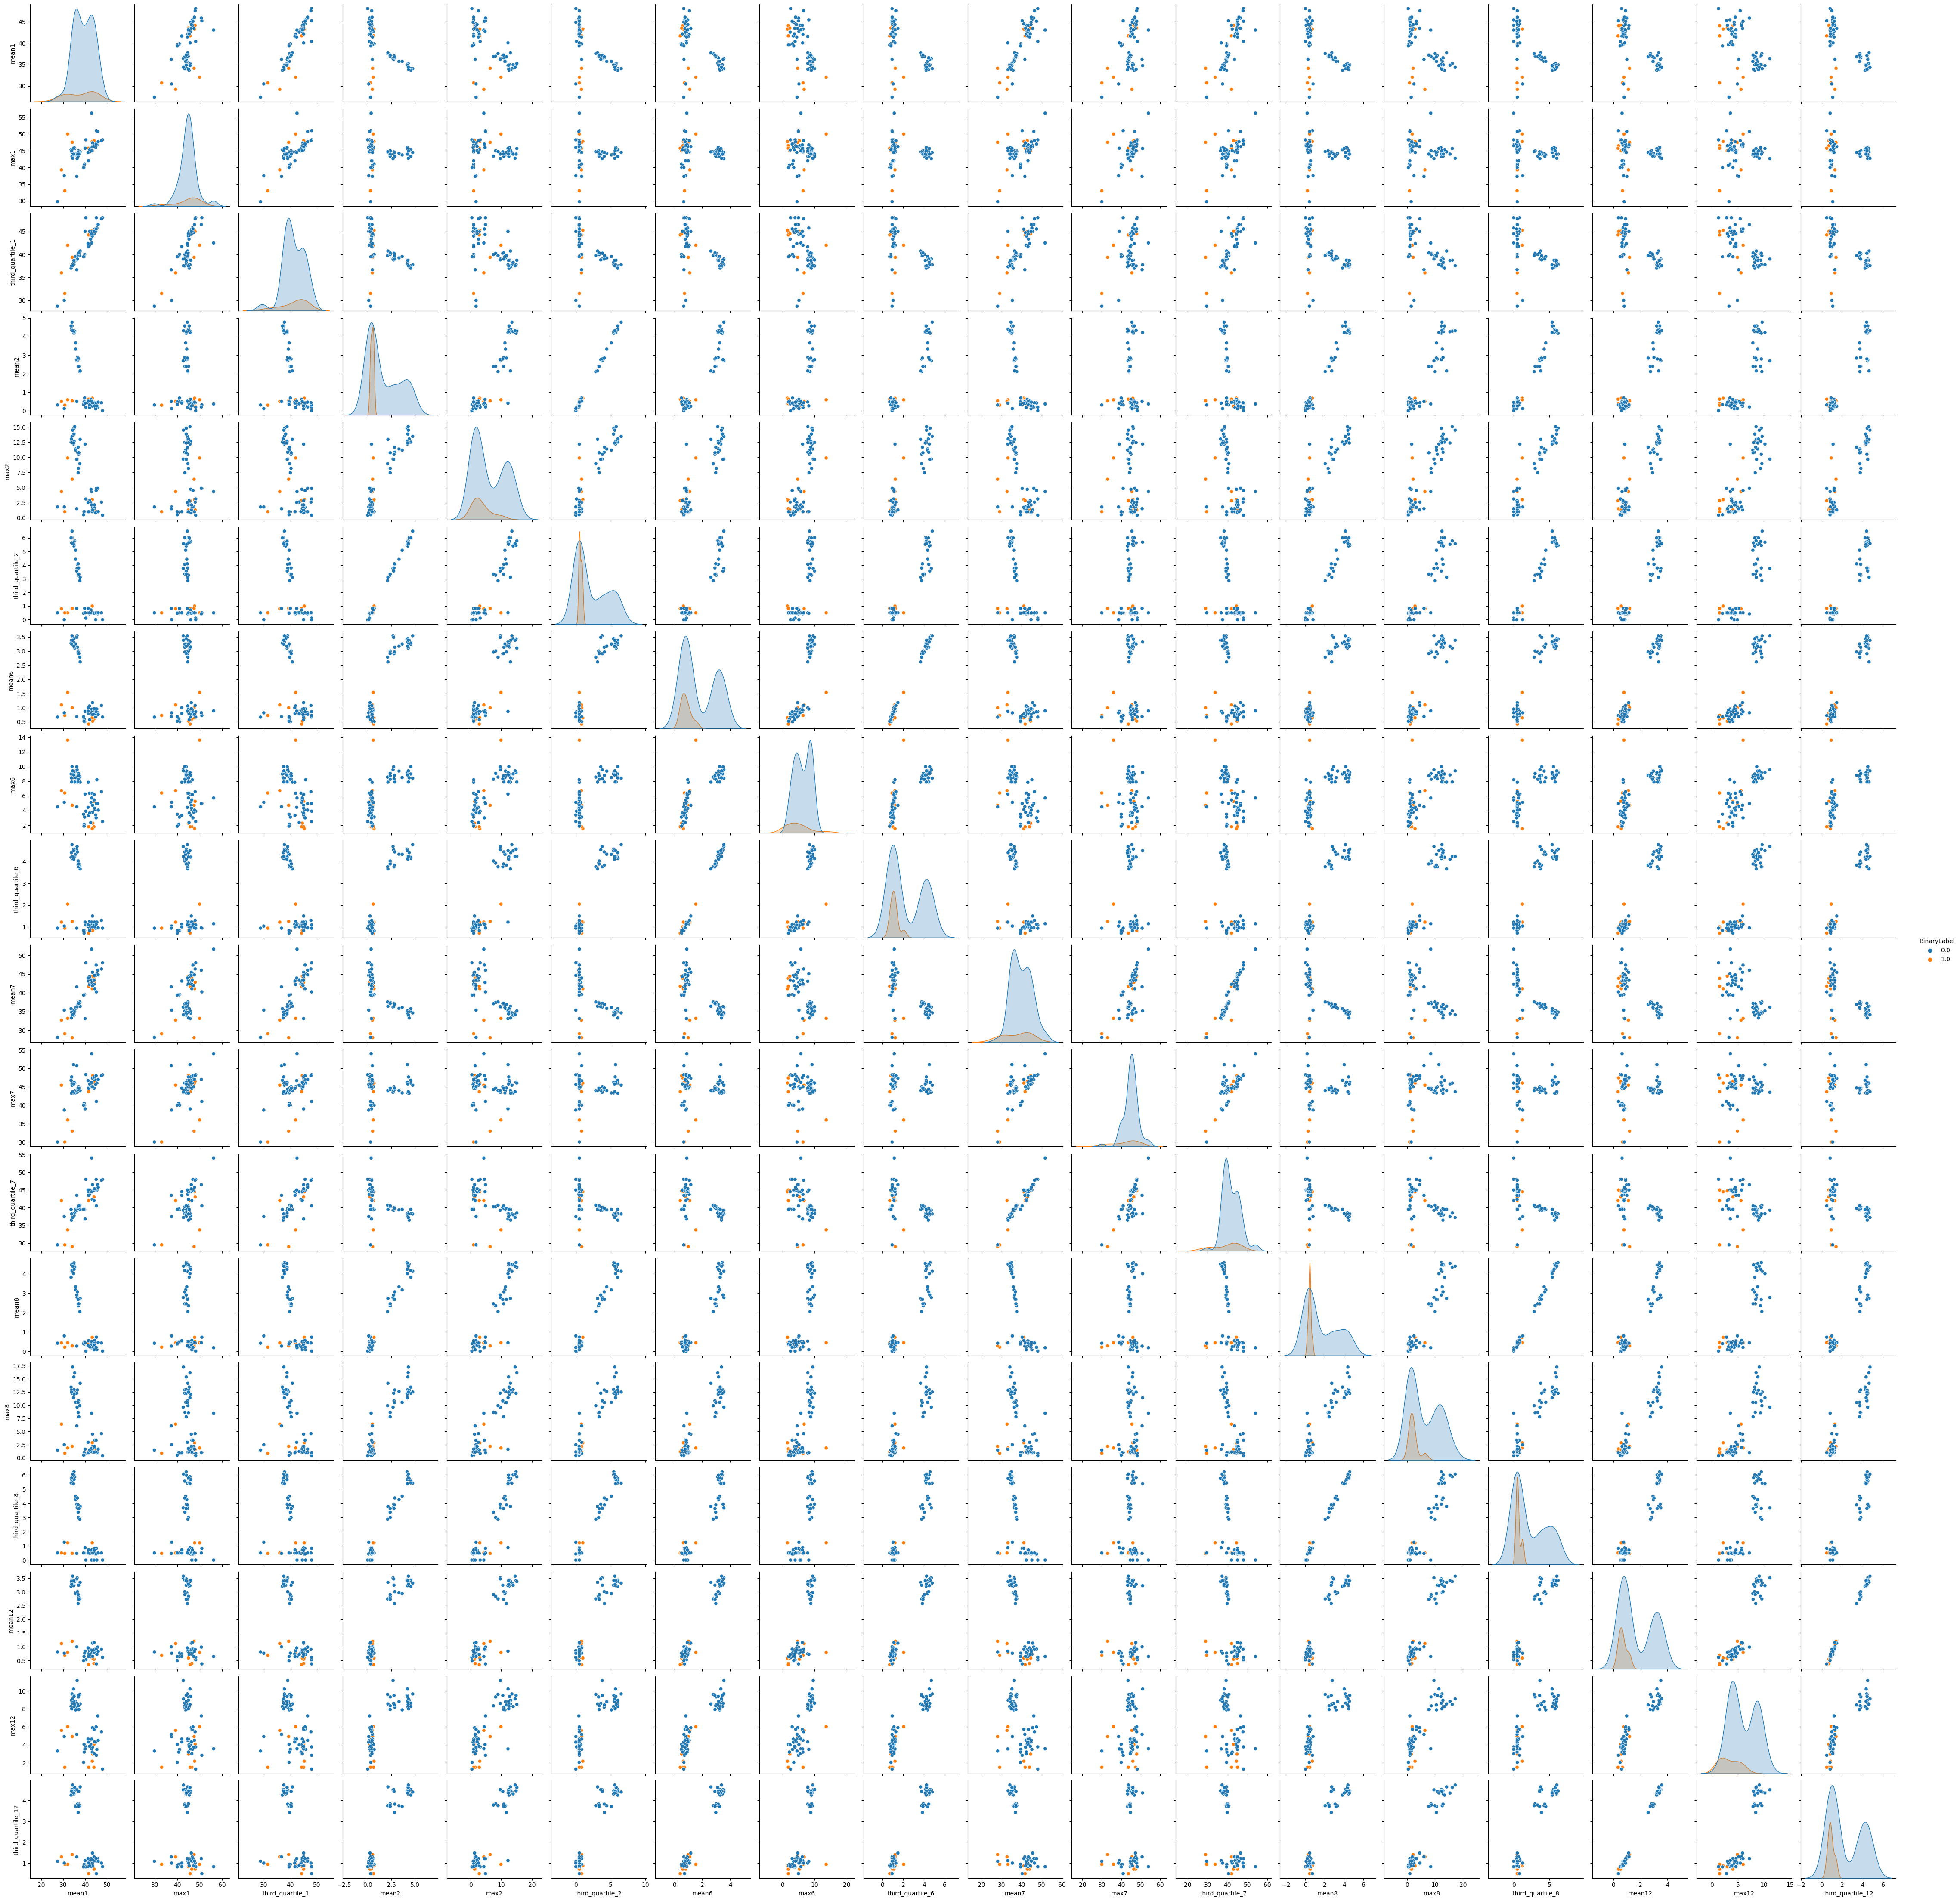

In [251]:
sns.pairplot(two_split_plot[split_plot_columns], hue='BinaryLabel')

#### Comparison

Ans) taking a closer look at the two graphs we see that some of the plots have a variation between the two graphs.

#### iii. Time Series Segments

#### Create different train datas

In [252]:
filter = ['mean', 'std', 'min', 'max', '25%', '75%']
folded_train_data = []
for i in range(1, 21):
    cols = createColumnName(6, i)
    cols.append('Labels')
    cols.append('BinaryLabel')
    rows = []
    for instance in train_instances:
        row = splitTrainData(instance, i, filter)
        row = np.append(row, train_data.iloc[len(rows),-2])
        row = np.append(row, train_data.iloc[len(rows),-1])        
        rows.append(row)
    train_data = pd.DataFrame(rows, columns=cols)
    folded_train_data.append(train_data)
print('Total train time series data: ', len(folded_train_data))

Total train time series data:  20


#### Create different test datas

In [253]:
filter = ['mean', 'std', 'min', 'max', '25%', '75%']
folded_test_data = []
for i in range(1, 21):
    test_bend_counter = 4
    cols = createColumnName(6, i)
    cols.append('Labels')
    cols.append('BinaryLabel')
    rows = []
    for instance in test_instances:
        row = splitTrainData(instance, i, filter)
        row = np.append(row, test_data.iloc[len(rows), -2])
        row = np.append(row, test_data.iloc[len(rows), -1])
        rows.append(row)
    test_data = pd.DataFrame(rows, columns=cols)
    folded_test_data.append(test_data)
print('Total test time series data: ', len(folded_test_data))

Total test time series data:  20


In [254]:
def logisticRegression(train_table, number_folds):
    train_X, train_Y = train_table.iloc[:, :-2], train_table.loc[:, 'BinaryLabel']
    
    # Run Logistic Regression and Recursive pruning
    skf  = StratifiedKFold(n_splits=number_folds, shuffle=True, random_state=60)
    model = LogisticRegression(max_iter=100)
    selector = RFECV(model, cv=skf, scoring='accuracy')
    
    selector.fit(train_X, train_Y)
    
    return model, selector

In [255]:
logistic_best_num_features = []
logistic_scores = []
count = 1
for series in folded_train_data:
    model, selector = logisticRegression(series, 5)
    logistic_best_num_features.append(selector.n_features_)
    logistic_scores.append(np.mean(selector.cv_results_['mean_test_score']))
    print("({}, {}) score = {}".format(count, logistic_best_num_features[-1], np.round(logistic_scores[-1], 5)))
    count += 1

(1, 20) score = 0.98223
(2, 12) score = 0.95697
(3, 11) score = 0.95501
(4, 6) score = 0.95959
(5, 28) score = 0.95759
(6, 19) score = 0.95052
(7, 34) score = 0.96365
(8, 42) score = 0.95008
(9, 54) score = 0.95663
(10, 46) score = 0.94963
(11, 86) score = 0.94553
(12, 74) score = 0.95954
(13, 68) score = 0.97246
(14, 91) score = 0.9637
(15, 74) score = 0.95583
(16, 48) score = 0.96068
(17, 73) score = 0.96357
(18, 1) score = 0.97821
(19, 72) score = 0.955
(20, 16) score = 0.96282


#### iv. Confusion Matrix

In [256]:
# Get list of best features
logistic_model, logistic_selector = logisticRegression(folded_train_data[0], 5)
logistic_selected_features = []

for column in range(len(folded_train_data[0].columns[:-2])):
    if logistic_selector.support_[column]:
        logistic_selected_features.append(folded_train_data[0].columns[column])
print(logistic_selected_features)

['mean1', 'min1', 'third_quartile_1', 'max2', 'third_quartile_2', 'mean3', 'min3', 'max3', 'third_quartile_3', 'median3', 'third_quartile_4', 'median4', 'mean5', 'min5', 'max5', 'first_quartile_5', 'third_quartile_5', 'median5', 'max6', 'third_quartile_6']


Confusion matrix, P-values, ROC, and AUC

In [257]:
logistic_train_x = folded_train_data[0].loc[:, logistic_selected_features]
logistic_train_y = folded_train_data[0].loc[:, 'BinaryLabel']

logistic_test_x = folded_test_data[0].loc[:, logistic_selected_features]
logistic_test_y = folded_test_data[0].loc[:, 'BinaryLabel']

logistic_model.fit(logistic_train_x, logistic_train_y)

logistic_train_prediction = logistic_model.predict(logistic_train_x)
logistic_test_prediction = logistic_model.predict(logistic_test_x)

# For P-values
logistic_train_x_const = sm.add_constant(logistic_train_x)
sm_model = sm.Logit(logistic_train_y, logistic_train_x_const)
result = sm_model.fit(method = 'lbfgs') # Thanks piazza support
print('P-values for model')
print(result.summary())
print()

# For Train confusion matrix
logistic_confusion_matrix_train = confusion_matrix(logistic_train_y, np.round(logistic_train_prediction))
print('Logistic Train Confusion Matrix')
print(logistic_confusion_matrix_train)
print()


# For Test confusion matrix
logistic_confusion_matrix_test = confusion_matrix(logistic_test_y, np.round(logistic_test_prediction))
print('Logistic Test Confusion Matrix')
print(logistic_confusion_matrix_test)
print()

P-values for model
                           Logit Regression Results                           
Dep. Variable:            BinaryLabel   No. Observations:                   69
Model:                          Logit   Df Residuals:                       48
Method:                           MLE   Df Model:                           20
Date:                Thu, 02 Mar 2023   Pseudo R-squ.:                   1.000
Time:                        02:21:48   Log-Likelihood:            -9.8122e-05
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 7.012e-05
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0389   1.94e+05  -2.01e-07      1.000    -3.8e+05     3.8e+05
mean1               -0.7806   2.37e+04   -3.3e-05      1.000   -4.64e+04    4.64e+04
min1     

#### v. Test Classifier

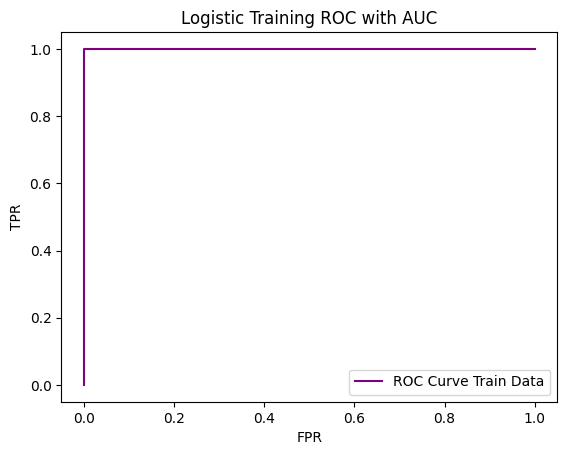

AUC Train Data =  1.0


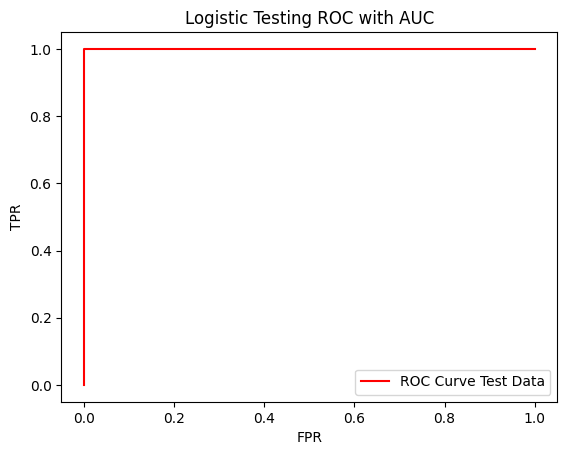

AUC Test Data =  1.0


In [258]:
# For ROC curve
logistic_fpr, logistic_tpr, logistic_threshold = roc_curve(logistic_train_y, logistic_train_prediction)
plt.plot(logistic_fpr, logistic_tpr, color='Purple', label='ROC Curve Train Data')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Logistic Training ROC with AUC')
plt.legend(loc='best')
plt.show()
print("AUC Train Data = ", auc(logistic_fpr, logistic_tpr))

logistic_fpr, logistic_tpr, logistic_threshold = roc_curve(logistic_test_y, logistic_test_prediction)
plt.plot(logistic_fpr, logistic_tpr, color='Red', label='ROC Curve Test Data')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Logistic Testing ROC with AUC')
plt.legend(loc='best')
plt.show()
print("AUC Test Data = ", auc(logistic_fpr, logistic_tpr))

#### vi. Separation

Based on the results from the statsmodels library we can see that the classes are well-separated, thus causing instability when calculating logistic regression parameters.

#### vii. Imbalance

As we can see from the confusion matrix there is a class imbalance in the data, because, compared to the non-bending data there is too little of bending data.

In [259]:
def logisticRegressionImbalance(train_table, number_folds):
    train_X, train_Y = train_table.iloc[:, :-2], train_table.loc[:, 'BinaryLabel']
    
    # Oversampling
    smote = SMOTE(random_state=42)
    new_X, new_Y = smote.fit_resample(train_X, train_Y)
    
    # Run Logistic Regression and Recursive pruning
    skf  = StratifiedKFold(n_splits=number_folds, shuffle=True, random_state=60)
    model = LogisticRegression(max_iter=100)
    selector = RFECV(model, cv=skf, scoring='accuracy')

    selector.fit(new_X, new_Y)
    return model, selector

In [260]:
imbalance_best_number_predictors = []
imbalance_model_scores = []
count = 1
for series in folded_train_data:
    imbalance_model, imbalance_selector = logisticRegressionImbalance(series, 5)
    imbalance_best_number_predictors.append(imbalance_selector.n_features_)
    imbalance_model_scores.append(np.mean(imbalance_selector.cv_results_['mean_test_score']))
    print("({}, {}) score = {}".format(count, np.round(imbalance_best_number_predictors[-1], 5), np.round(imbalance_model_scores[-1], 5)))
    count += 1

(1, 8) score = 0.99484
(2, 8) score = 0.98413
(3, 6) score = 0.98737
(4, 5) score = 0.98874
(5, 4) score = 0.98782
(6, 7) score = 0.98714
(7, 10) score = 0.98909
(8, 8) score = 0.98234
(9, 6) score = 0.98417
(10, 6) score = 0.98498
(11, 5) score = 0.98808
(12, 3) score = 0.98826
(13, 27) score = 0.9855
(14, 5) score = 0.98713
(15, 4) score = 0.98697
(16, 5) score = 0.98845
(17, 7) score = 0.99147
(18, 1) score = 0.98919
(19, 2) score = 0.99014
(20, 2) score = 0.99031


#### Confusion matrix, P-values, ROC, and AUC

In [261]:
imbalance_training_x, imbalance_training_y = folded_train_data[0].iloc[:, :-2], folded_train_data[0].loc[:, 'BinaryLabel']

# Oversampling
smote = SMOTE(random_state=42)
balanced_x, balanced_y = smote.fit_resample(imbalance_training_x, imbalance_training_y)

# Run Logistic Regression and Recursive pruning
skf  = StratifiedKFold(n_splits=5, shuffle=True, random_state=60)
logistic_imbalance_model = LogisticRegression(max_iter=100)
logistic_imbalance_selector = RFECV(logistic_imbalance_model, cv=skf, scoring='accuracy')
logistic_imbalance_selector.fit(balanced_x, balanced_y)

imbalance_selected_features = []
for column in range(len(balanced_x.columns) -1):
    if logistic_imbalance_selector.support_[column]:
        imbalance_selected_features.append(balanced_x.columns[column])
print(imbalance_selected_features)

['third_quartile_1', 'min3', 'first_quartile_3', 'mean5', 'min5', 'max5', 'first_quartile_5', 'third_quartile_5']


In [262]:
logistic_balanced_training_x = balanced_x.loc[:, imbalance_selected_features]
logistic_balanced_training_y = balanced_y

logistic_balanced_testing_x = folded_test_data[0].loc[:, imbalance_selected_features]
logistic_balanced_testing_y = folded_test_data[0].loc[:, 'BinaryLabel']

# For P-values
imbalance_const_trian_x = sm.add_constant(logistic_balanced_training_x)
imbalance_sm_model = sm.Logit(logistic_balanced_training_y, imbalance_const_trian_x)
imbalance_result = imbalance_sm_model.fit(method = 'lbfgs') # Thanks piazza support
print('P-values for model with Imabalanace Fix')
print(imbalance_result.summary())
print()

logistic_imbalance_model.fit(logistic_balanced_training_x, logistic_balanced_training_y)
logistic_imbalance_train_prediction = logistic_imbalance_model.predict(logistic_balanced_training_x)
logistic_imbalance_test_prediction = logistic_imbalance_model.predict(logistic_balanced_testing_x)

# For Train confusion matrix
logistic_imbalance_confusion_matrix_train = confusion_matrix(logistic_balanced_training_y, np.round(logistic_imbalance_train_prediction))
print('Logistic Imabalance Train Confusion Matrix')
print(logistic_imbalance_confusion_matrix_train)
print()

# For Test confusion matrix
logistic_imbalance_confusion_matrix_test = confusion_matrix(logistic_balanced_testing_y, np.round(logistic_imbalance_test_prediction))
print('Logistic Imabalance Test Confusion Matrix')
print(logistic_imbalance_confusion_matrix_test)
print()


P-values for model with Imabalanace Fix
                           Logit Regression Results                           
Dep. Variable:            BinaryLabel   No. Observations:                  120
Model:                          Logit   Df Residuals:                      111
Method:                           MLE   Df Model:                            8
Date:                Thu, 02 Mar 2023   Pseudo R-squ.:                   1.000
Time:                        03:02:12   Log-Likelihood:            -4.0851e-05
converged:                       True   LL-Null:                       -83.178
Covariance Type:            nonrobust   LLR p-value:                 7.482e-32
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2759   2.76e+04     -1e-05      1.000    -5.4e+04     5.4e+04
third_quartile_1    -3.3156    389.975     -0.009      0.993    -767.653 

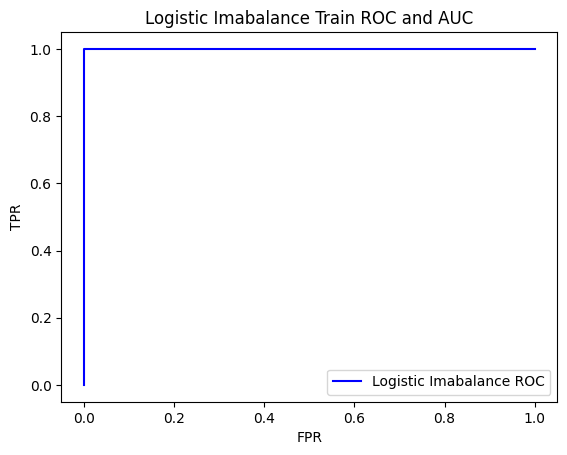

Train AUC =  1.0


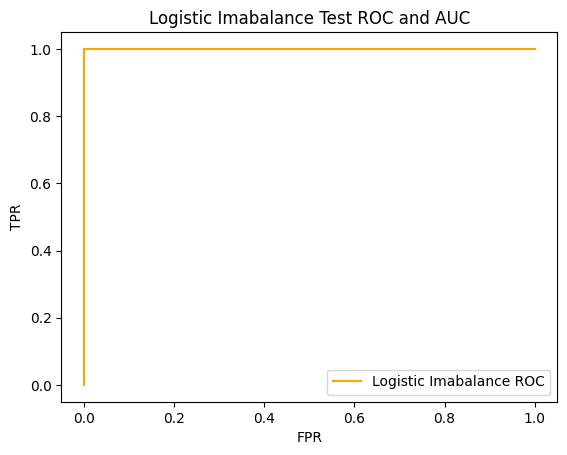

Test AUC =  1.0


In [263]:
# For ROC curve
logistic_imbalance_fpr, logistic_imbalance_tpr, logistic_imbalance_threshold = roc_curve(logistic_balanced_training_y, logistic_imbalance_train_prediction)
plt.plot(logistic_imbalance_fpr, logistic_imbalance_tpr, color='Blue', label='Logistic Imabalance ROC')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Logistic Imabalance Train ROC and AUC')
plt.legend(loc='best')
plt.show()
print("Train AUC = ", auc(logistic_imbalance_fpr, logistic_imbalance_tpr))

# For ROC curve
logistic_imbalance_fpr, logistic_imbalance_tpr, logistic_imbalance_threshold = roc_curve(logistic_balanced_testing_y, logistic_imbalance_test_prediction)
plt.plot(logistic_imbalance_fpr, logistic_imbalance_tpr, color='Orange', label='Logistic Imabalance ROC')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Logistic Imabalance Test ROC and AUC')
plt.legend(loc='best')
plt.show()
print("Test AUC = ", auc(logistic_imbalance_fpr, logistic_imbalance_tpr))

### (b) Binary Classification Using L1-penalized logistic regression

#### i. Time Series Segments

In [264]:
def logisticRegressionL1(train_table, test_table):
    train_X, train_Y = train_table.iloc[:, :-2], train_table.loc[:, 'BinaryLabel']
    test_x, test_y = test_table.iloc[:, :-2], test_table.loc[:, 'BinaryLabel']
 
    # Oversampling
    smote = SMOTE(random_state=42)
    new_X, new_Y = smote.fit_resample(train_X, train_Y)

    # Run Logistic Regression and Recursive pruning
    # Default has Stratified K Fold with 5 folds

    model = LogisticRegressionCV(penalty='l1', solver='liblinear', max_iter=100)
    model.fit(new_X, new_Y)

    print(', Train Score = {}, Test Score = {}'.format(np.round(model.score(new_X, new_Y), 5), np.round(model.score(test_x, test_y),5)))

    return model

In [265]:
count = 1
for series in folded_train_data:
    print('L = ', count, end="")
    l1_penalty_model = logisticRegressionL1(series, folded_test_data[count-1])
    count += 1

L =  1, Train Score = 0.98333, Test Score = 0.89474
L =  2, Train Score = 1.0, Test Score = 1.0
L =  3, Train Score = 1.0, Test Score = 1.0
L =  4, Train Score = 1.0, Test Score = 0.94737
L =  5, Train Score = 0.99167, Test Score = 1.0
L =  6, Train Score = 0.99167, Test Score = 1.0
L =  7, Train Score = 0.99167, Test Score = 0.94737
L =  8, Train Score = 1.0, Test Score = 0.94737
L =  9, Train Score = 1.0, Test Score = 1.0
L =  10, Train Score = 1.0, Test Score = 0.94737
L =  11, Train Score = 1.0, Test Score = 0.94737
L =  12, Train Score = 1.0, Test Score = 1.0
L =  13, Train Score = 1.0, Test Score = 1.0
L =  14, Train Score = 1.0, Test Score = 0.94737
L =  15, Train Score = 1.0, Test Score = 1.0
L =  16, Train Score = 1.0, Test Score = 1.0
L =  17, Train Score = 0.99167, Test Score = 1.0
L =  18, Train Score = 0.99167, Test Score = 1.0
L =  19, Train Score = 1.0, Test Score = 1.0
L =  20, Train Score = 1.0, Test Score = 0.94737


In [266]:
l1_train_X, l1_train_Y = folded_train_data[0].iloc[:, :-2], folded_train_data[0].loc[:, 'BinaryLabel']

# Oversampling
smote = SMOTE(random_state=42)
l1_training_x, l1_training_y = smote.fit_resample(l1_train_X, l1_train_Y)

# Run Logistic Regression and Recursive pruning
# Default has Stratified K Fold with 5 folds
l1_model = LogisticRegressionCV(penalty='l1', solver='liblinear', max_iter=100)
l1_model.fit(l1_training_x, l1_training_y)

l1_test_x, l1_test_y = folded_test_data[0].iloc[:, :-2], folded_test_data[0].loc[:, 'BinaryLabel']

l1_model.fit(l1_training_x, l1_training_y)
l1_train_prediction = l1_model.predict(l1_training_x)
l1_test_prediction = l1_model.predict(l1_test_x)

# For Train confusion matrix
l1_confusion_matrix_train = confusion_matrix(l1_training_y, np.round(l1_train_prediction))
print('Logistic L1 Train Confusion Matrix')
print(l1_confusion_matrix_train)
print()

# For Test confusion matrix
l1_confusion_matrix_test = confusion_matrix(l1_test_y, np.round(l1_test_prediction))
print('Logistic L1 Test Confusion Matrix')
print(l1_confusion_matrix_test)
print()

Logistic L1 Train Confusion Matrix
[[60  0]
 [ 0 60]]

Logistic L1 Test Confusion Matrix
[[15  0]
 [ 0  4]]



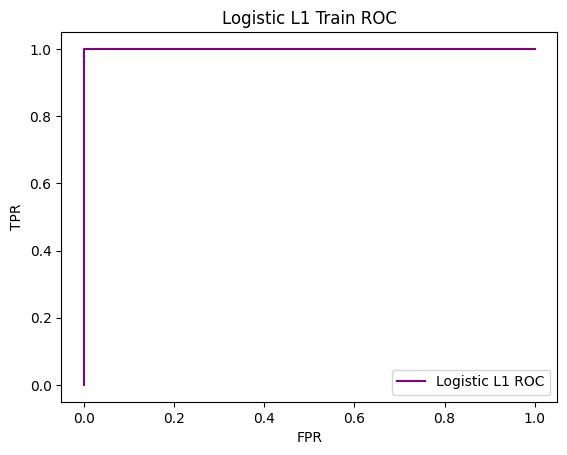

Train AUC =  1.0


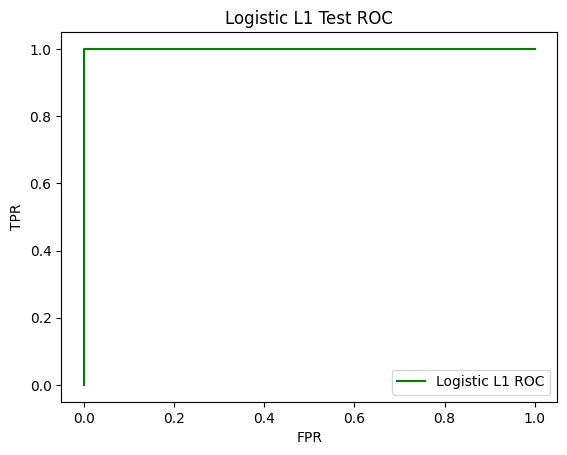

Test AUC =  1.0


In [267]:
# For Train ROC curve
l1_fpr, l1_tpr, l1_threshold = roc_curve(l1_training_y, l1_train_prediction)
plt.plot(l1_fpr, l1_tpr, color='Purple', label='Logistic L1 ROC')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Logistic L1 Train ROC')
plt.legend(loc='best')
plt.show()
print("Train AUC = ", auc(l1_fpr, l1_tpr))

# For Test ROC curve
l1_fpr, l1_tpr, l1_threshold = roc_curve(l1_test_y, l1_test_prediction)
plt.plot(l1_fpr, l1_tpr, color='Green', label='Logistic L1 ROC')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Logistic L1 Test ROC')
plt.legend(loc='best')
plt.show()
print("Test AUC = ", auc(l1_fpr, l1_tpr))

#### ii. Comparison

Based on the Test Scores of the models, I would state that using the L1 Logistic model gives better results than the plain Logistics Regression Model with Imbalance fix. Additionally, the L1 model is easier to implement.

### (c) Multi-class Classification (The Realistic Case)

#### i. Time Series Segments

In [268]:
def multiclassClassification(train_table, test_table):
    train_X, train_Y = train_table.iloc[:, :-2], train_table.loc[:, 'Labels']
    test_X, test_Y = test_table.iloc[:, :-2], test_table.loc[:, 'Labels']
    
    # Run Logistic Regression and Recursive pruning
    # Default has Stratified K Fold with 5 folds

    model = LogisticRegressionCV(penalty='l1', solver='saga', multi_class='multinomial', max_iter=100)
    model.fit(train_X, train_Y)
    print(', Train Score = {}, Test Score = {}'.format(np.round(model.score(train_X, train_Y), 5), np.round(model.score(test_X, test_Y), 5)))
    return model 

In [269]:
count = 1
for series in folded_train_data:
    print('Multi-class: L = ', count, end="")
    multi_class = multiclassClassification(series, folded_test_data[count-1])
    count += 1

Multi-class: L =  1, Train Score = 1.0, Test Score = 0.84211
Multi-class: L =  2, Train Score = 1.0, Test Score = 0.89474
Multi-class: L =  3, Train Score = 1.0, Test Score = 0.78947
Multi-class: L =  4, Train Score = 1.0, Test Score = 0.84211
Multi-class: L =  5, Train Score = 1.0, Test Score = 0.84211
Multi-class: L =  6, Train Score = 1.0, Test Score = 0.78947
Multi-class: L =  7, Train Score = 1.0, Test Score = 0.78947
Multi-class: L =  8, Train Score = 1.0, Test Score = 0.78947
Multi-class: L =  9, Train Score = 0.98551, Test Score = 0.78947
Multi-class: L =  10, Train Score = 1.0, Test Score = 0.78947
Multi-class: L =  11, Train Score = 0.98551, Test Score = 0.78947
Multi-class: L =  12, Train Score = 1.0, Test Score = 0.78947
Multi-class: L =  13, Train Score = 0.98551, Test Score = 0.78947
Multi-class: L =  14, Train Score = 0.98551, Test Score = 0.78947
Multi-class: L =  15, Train Score = 1.0, Test Score = 0.78947
Multi-class: L =  16, Train Score = 1.0, Test Score = 0.78947
M

Confusion Matrix and ROC

In [270]:
multi_class_train_X, multi_class_train_Y = folded_train_data[0].iloc[:, :-2], folded_train_data[0].loc[:, 'Labels']
multi_class_test_X, multi_class_test_Y = folded_test_data[0].iloc[:, :-2], folded_test_data[0].loc[:, 'Labels']

multi_class_model = LogisticRegressionCV(penalty='l1', solver='saga', multi_class='multinomial', max_iter=100)
multi_class_model.fit(multi_class_train_X, multi_class_train_Y)

multi_class_model.fit(multi_class_train_X, multi_class_train_Y)
multi_class_pred_train = multi_class_model.predict(multi_class_train_X)
multi_class_pred_test = multi_class_model.predict(multi_class_test_X)

# For Train confusion matrix
multi_confusion_matrix_train = confusion_matrix(multi_class_train_Y, np.round(multi_class_pred_train))
print('Multi-Class Train Confusion Matrix')
print(multi_confusion_matrix_train)
print()

# For Test confusion matrix
multi_confusion_matrix_test = confusion_matrix(multi_class_test_Y, np.round(multi_class_pred_test))
print('Multi-Class Test Confusion Matrix')
print(multi_confusion_matrix_test)
print()

Multi-Class Train Confusion Matrix
[[ 5  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  0 12  0  0]
 [ 0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0 12]]

Multi-Class Test Confusion Matrix
[[2 0 0 0 0 0 0]
 [0 1 1 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 1 1 1 0]
 [0 0 0 0 0 0 3]]



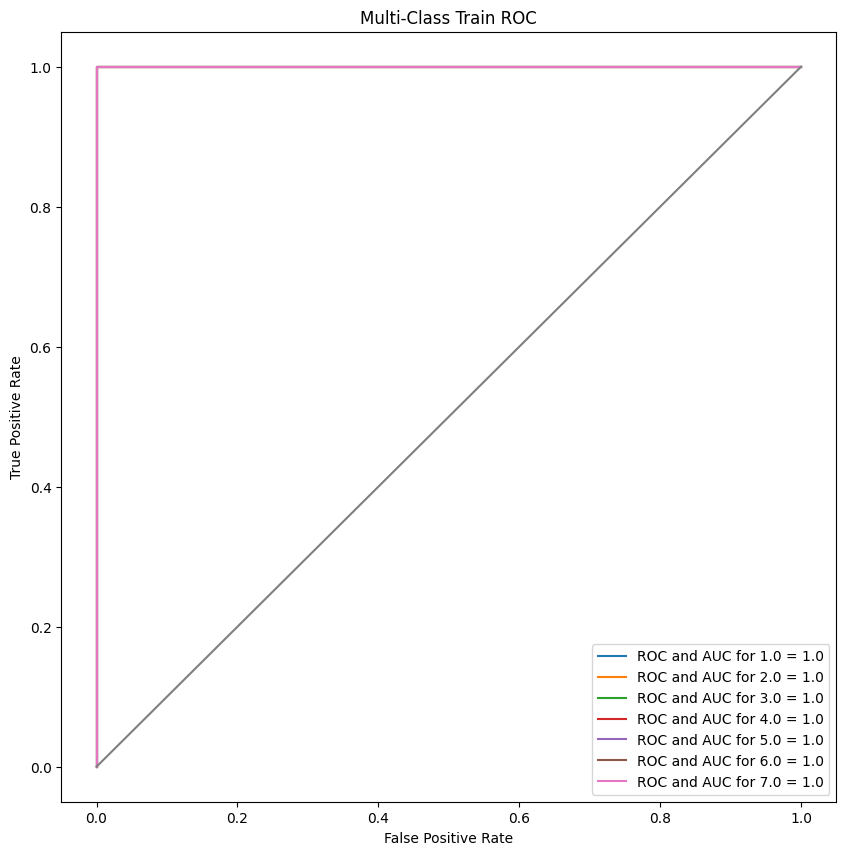

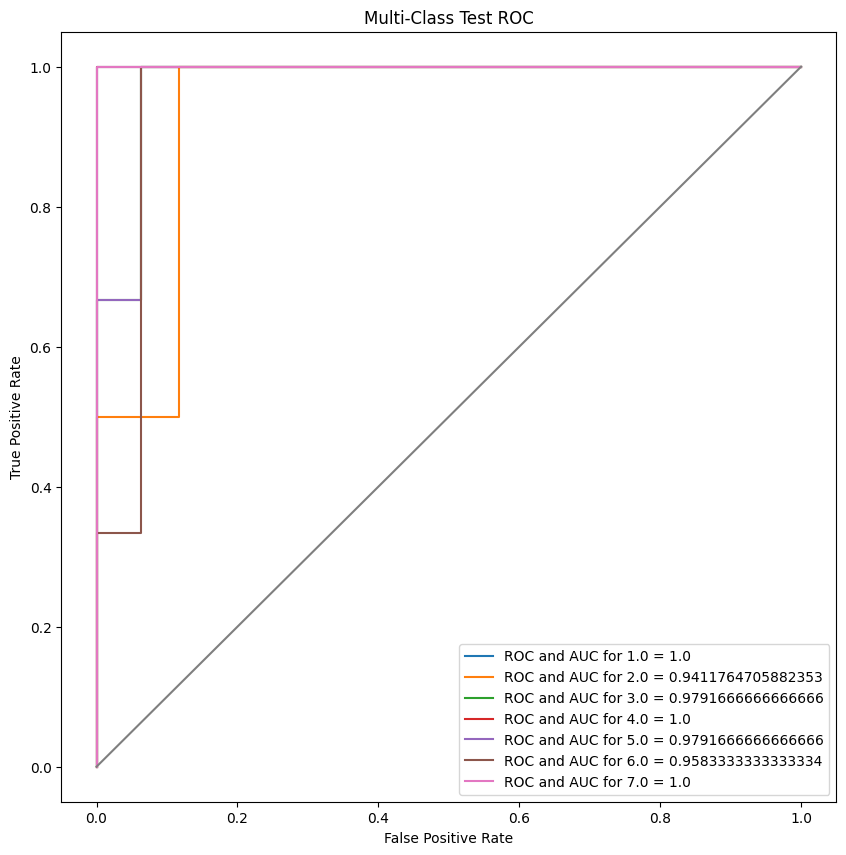

In [271]:
multi_train_proba = multi_class_model.predict_proba(multi_class_train_X)
multi_test_proba = multi_class_model.predict_proba(multi_class_test_X)

fig, ax = plt.subplots(figsize=(10, 10))
for idx, label in enumerate(multi_class_model.classes_):
    multi_fpr, multi_tpr, multi_thres = roc_curve(multi_class_train_Y, multi_train_proba[:, idx], pos_label=label)
    ax.plot(multi_fpr, multi_tpr, label="ROC and AUC for {} = {}".format(label, auc(multi_fpr, multi_tpr)))
ax.plot([0, 1], [0, 1])
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("Multi-Class Train ROC")
ax.legend(loc='best')
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
for idx, label in enumerate(multi_class_model.classes_):
    multi_fpr, multi_tpr, multi_thres = roc_curve(multi_class_test_Y, multi_test_proba[:, idx], pos_label=label)
    ax.plot(multi_fpr, multi_tpr, label="ROC and AUC for {} = {}".format(label, auc(multi_fpr, multi_tpr)))
ax.plot([0, 1], [0, 1])
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("Multi-Class Test ROC")
ax.legend(loc='best')
plt.show()

#### ii. Naive Bayes

#### Gaussian

In [272]:
count = 1
for series in folded_train_data:
    train_X, train_Y = series.iloc[:, :-2], series.loc[:, 'Labels']
    test_x, test_y = folded_test_data[count-1].iloc[:, :-2], folded_test_data[count-1].loc[:, 'Labels'] 

    count+=1

    model = GaussianNB()
    model.fit(train_X, train_Y)

    train_score = model.score(train_X, train_Y) 
    test_score  = model.score(test_x, test_y)

    print('Gausian Naive Bayes: L = {}, Train Score: {}, Test Score: {}'.format(count, np.round(train_score, 5), np.round(test_score, 5)))

Gausian Naive Bayes: L = 2, Train Score: 0.98551, Test Score: 0.78947
Gausian Naive Bayes: L = 3, Train Score: 1.0, Test Score: 0.63158
Gausian Naive Bayes: L = 4, Train Score: 1.0, Test Score: 0.68421
Gausian Naive Bayes: L = 5, Train Score: 0.98551, Test Score: 0.73684
Gausian Naive Bayes: L = 6, Train Score: 1.0, Test Score: 0.84211
Gausian Naive Bayes: L = 7, Train Score: 0.98551, Test Score: 0.63158
Gausian Naive Bayes: L = 8, Train Score: 1.0, Test Score: 0.78947
Gausian Naive Bayes: L = 9, Train Score: 0.98551, Test Score: 0.68421
Gausian Naive Bayes: L = 10, Train Score: 1.0, Test Score: 0.68421
Gausian Naive Bayes: L = 11, Train Score: 1.0, Test Score: 0.73684
Gausian Naive Bayes: L = 12, Train Score: 1.0, Test Score: 0.73684
Gausian Naive Bayes: L = 13, Train Score: 1.0, Test Score: 0.63158
Gausian Naive Bayes: L = 14, Train Score: 1.0, Test Score: 0.57895
Gausian Naive Bayes: L = 15, Train Score: 1.0, Test Score: 0.63158
Gausian Naive Bayes: L = 16, Train Score: 1.0, Test Sc

Confusion Matrix and ROC

In [273]:
naive_train_X, naive_train_Y = folded_train_data[0].iloc[:, :-2], folded_train_data[0].loc[:, 'Labels']
naive_test_X, naive_test_Y = folded_test_data[0].iloc[:, :-2], folded_test_data[0].loc[:, 'Labels']

naive_model = GaussianNB()
naive_model.fit(naive_train_X, naive_train_Y)

naive_pred_train = naive_model.predict(naive_train_X)
naive_pred_test = naive_model.predict(naive_test_X)

# For Train confusion matrix
naive_confusion_matrix_train = confusion_matrix(naive_train_Y, np.round(naive_pred_train))
print('Naive Bayes Gaussian Train Confusion Matrix')
print(naive_confusion_matrix_train)
print()

# For Test confusion matrix
naive_confusion_matrix_test = confusion_matrix(naive_test_Y, np.round(naive_pred_test))
print('Naive Bayes Gaussian Test Confusion Matrix')
print(naive_confusion_matrix_test)
print()

Naive Bayes Gaussian Train Confusion Matrix
[[ 5  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  0 11  1  0]
 [ 0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0 12]]

Naive Bayes Gaussian Test Confusion Matrix
[[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 0 3]]



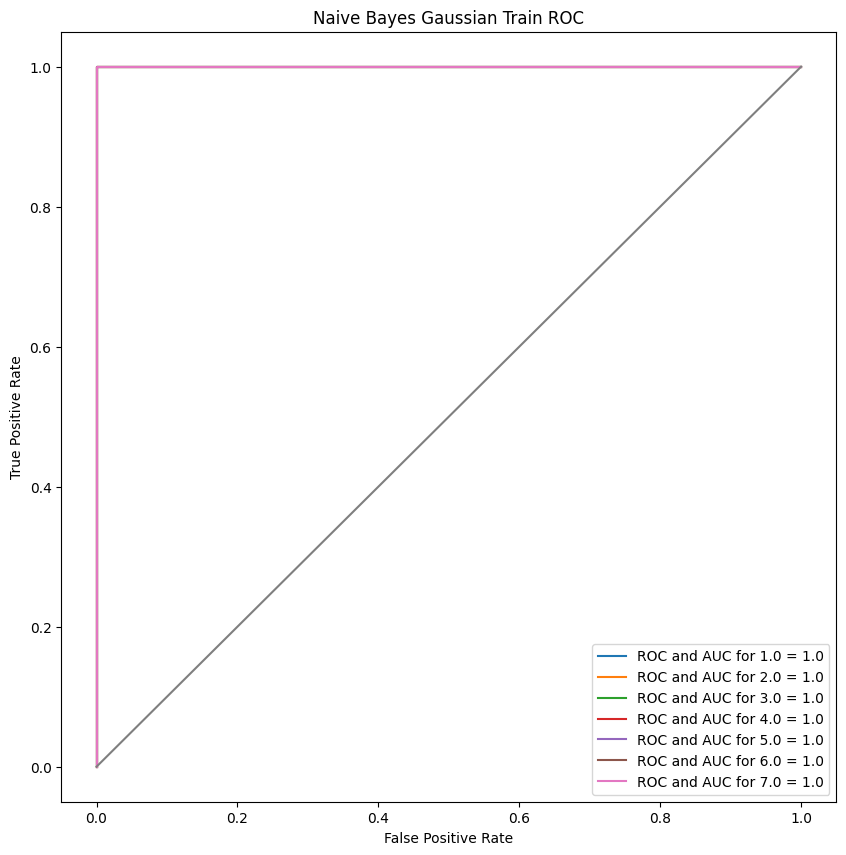

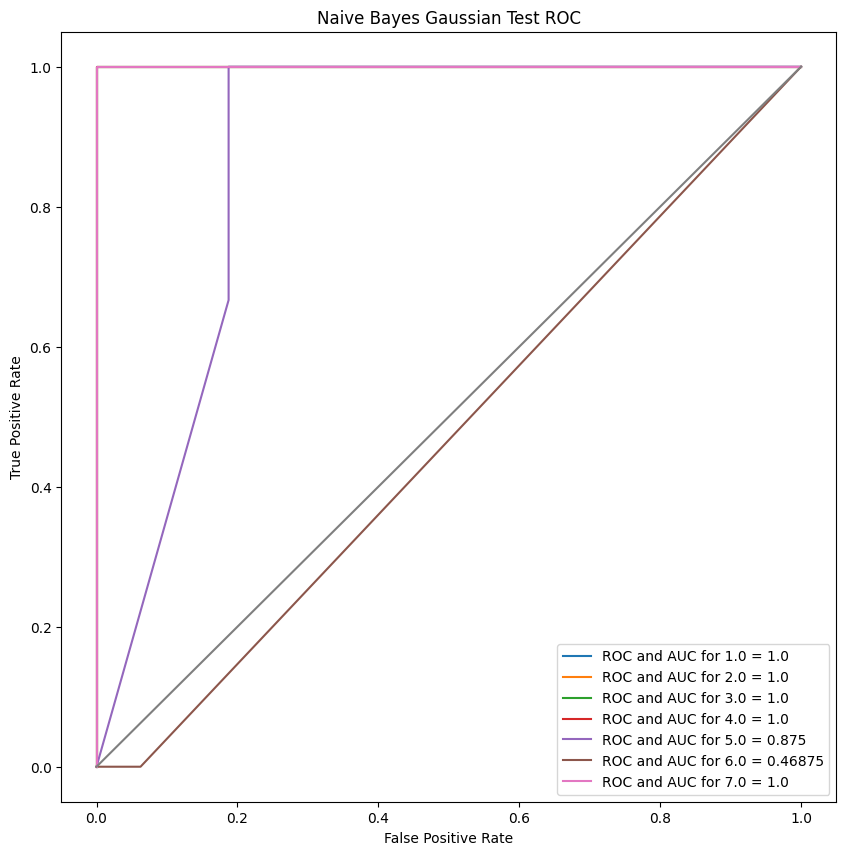

In [274]:
naive_train_proba = naive_model.predict_proba(naive_train_X)
naive_test_proba = naive_model.predict_proba(naive_test_X)

fig, ax = plt.subplots(figsize=(10, 10))
for idx, label in enumerate(naive_model.classes_):
    naive_fpr, naive_tpr, naive_thres = roc_curve(naive_train_Y, naive_train_proba[:, idx], pos_label=label)
    ax.plot(naive_fpr, naive_tpr, label="ROC and AUC for {} = {}".format(label, auc(naive_fpr, naive_tpr)))
ax.plot([0, 1], [0, 1])
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("Naive Bayes Gaussian Train ROC")
ax.legend(loc='best')
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
for idx, label in enumerate(naive_model.classes_):
    naive_fpr, naive_tpr, naive_thres = roc_curve(naive_test_Y, naive_test_proba[:, idx], pos_label=label)
    ax.plot(naive_fpr, naive_tpr, label="ROC and AUC for {} = {}".format(label, auc(naive_fpr, naive_tpr)))
ax.plot([0, 1], [0, 1])
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("Naive Bayes Gaussian Test ROC")
ax.legend(loc='best')
plt.show()

##### Multinomial

In [275]:
count = 1
for series in folded_train_data:
    train_X, train_Y = series.iloc[:, :-2], series.loc[:, 'Labels']
    test_x, test_y = folded_test_data[count-1].iloc[:, :-2], folded_test_data[count-1].loc[:, 'Labels'] 

    count += 1

    model = MultinomialNB()
    model.fit(train_X, train_Y)

    train_score = model.score(train_X, train_Y) 
    test_score  = model.score(test_x, test_y)

    print('Multinomial Naive Bayes, L = {}, Train Score = {}, Test Score = {}'.format(count, np.round(train_score, 5), np.round(test_score, 5)))

Multinomial Naive Bayes, L = 2, Train Score = 0.94203, Test Score = 0.84211
Multinomial Naive Bayes, L = 3, Train Score = 0.94203, Test Score = 0.84211
Multinomial Naive Bayes, L = 4, Train Score = 0.94203, Test Score = 0.84211
Multinomial Naive Bayes, L = 5, Train Score = 0.95652, Test Score = 0.89474
Multinomial Naive Bayes, L = 6, Train Score = 0.92754, Test Score = 0.78947
Multinomial Naive Bayes, L = 7, Train Score = 0.95652, Test Score = 0.78947
Multinomial Naive Bayes, L = 8, Train Score = 0.92754, Test Score = 0.78947
Multinomial Naive Bayes, L = 9, Train Score = 0.94203, Test Score = 0.73684
Multinomial Naive Bayes, L = 10, Train Score = 0.94203, Test Score = 0.78947
Multinomial Naive Bayes, L = 11, Train Score = 0.94203, Test Score = 0.78947
Multinomial Naive Bayes, L = 12, Train Score = 0.94203, Test Score = 0.78947
Multinomial Naive Bayes, L = 13, Train Score = 0.94203, Test Score = 0.78947
Multinomial Naive Bayes, L = 14, Train Score = 0.94203, Test Score = 0.78947
Multino

Confusion Matrix and ROC

In [276]:
nb_multi_train_X, nb_multi_train_Y = folded_train_data[0].iloc[:, :-2], folded_train_data[0].loc[:, 'Labels']
nb_multi_test_X, nb_multi_test_Y = folded_test_data[0].iloc[:, :-2], folded_test_data[0].loc[:, 'Labels']

nb_multi_model = MultinomialNB()
nb_multi_model.fit(nb_multi_train_X, nb_multi_train_Y)

nb_multi_pred_train = nb_multi_model.predict(nb_multi_train_X)
nb_multi_pred_test = nb_multi_model.predict(nb_multi_test_X)

# For Train confusion matrix
nb_multi_confusion_matrix_train = confusion_matrix(nb_multi_train_Y, np.round(nb_multi_pred_train))
print('Naive Bayes Multinomial Train Confusion Matrix')
print(nb_multi_confusion_matrix_train)
print()

# For Test confusion matrix
nb_multi_confusion_matrix_test = confusion_matrix(nb_multi_test_Y, np.round(nb_multi_pred_test))
print('Naive Bayes Multinomial Test Confusion Matrix')
print(nb_multi_confusion_matrix_test)
print()

Naive Bayes Multinomial Train Confusion Matrix
[[ 5  0  0  0  0  0  0]
 [ 1  3  0  0  0  0  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0  0 12  0  0  0]
 [ 0  1  0  1 10  0  0]
 [ 0  0  0  0  1 11  0]
 [ 0  0  0  0  0  0 12]]

Naive Bayes Multinomial Test Confusion Matrix
[[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 1 1 1 0]
 [0 0 0 0 0 0 3]]



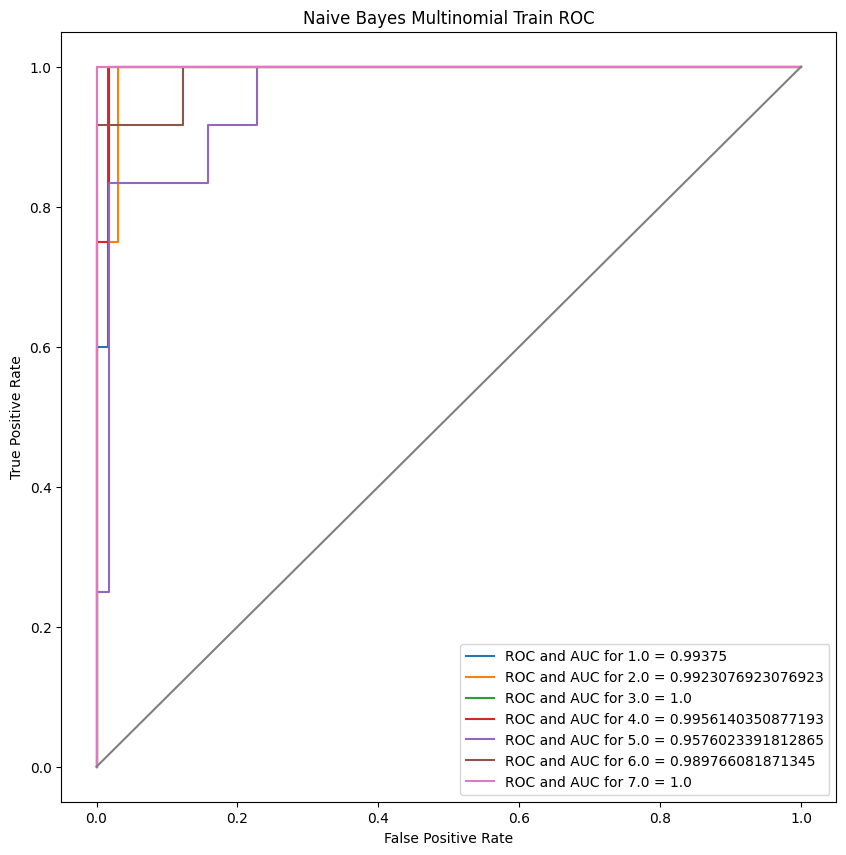

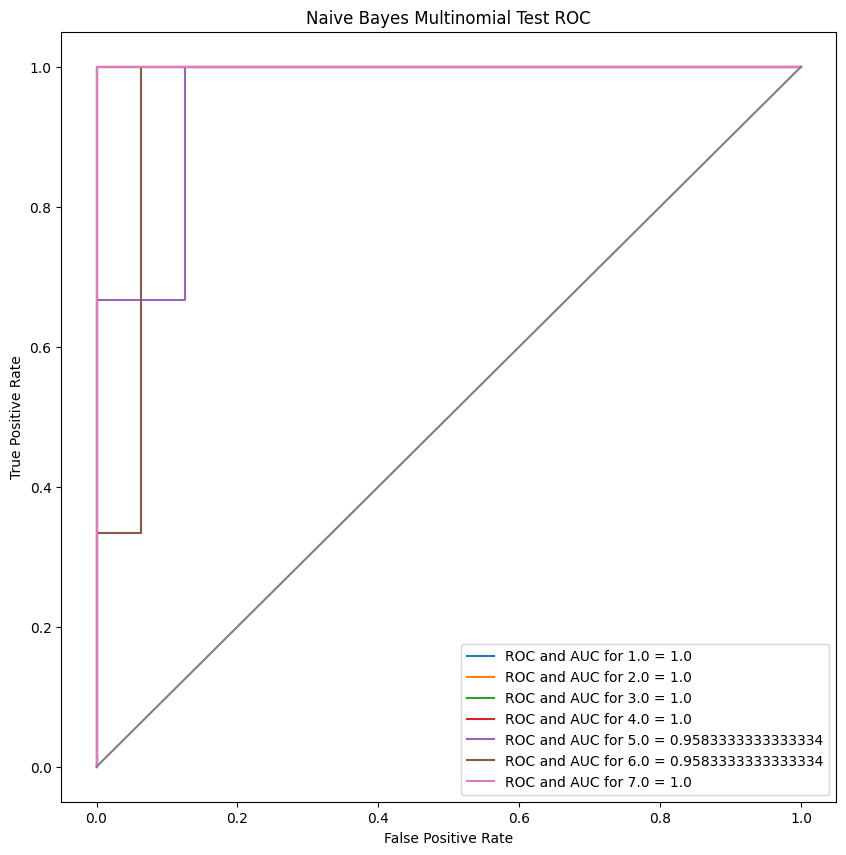

In [277]:
nb_multi_train_proba = nb_multi_model.predict_proba(nb_multi_train_X)
nb_multi_test_proba = nb_multi_model.predict_proba(nb_multi_test_X)

fig, ax = plt.subplots(figsize=(10, 10))
for idx, label in enumerate(nb_multi_model.classes_):
    nb_multi_fpr, nb_multi_tpr, nb_multi_thres = roc_curve(nb_multi_train_Y, nb_multi_train_proba[:, idx], pos_label=label)
    ax.plot(nb_multi_fpr, nb_multi_tpr, label="ROC and AUC for {} = {}".format(label, auc(nb_multi_fpr, nb_multi_tpr)))
ax.plot([0, 1], [0, 1])
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("Naive Bayes Multinomial Train ROC")
ax.legend(loc='best')
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
for idx, label in enumerate(nb_multi_model.classes_):
    nb_multi_fpr, nb_multi_tpr, nb_multi_thres = roc_curve(nb_multi_test_Y, nb_multi_test_proba[:, idx], pos_label=label)
    ax.plot(nb_multi_fpr, nb_multi_tpr, label="ROC and AUC for {} = {}".format(label, auc(nb_multi_fpr, nb_multi_tpr)))
ax.plot([0, 1], [0, 1])
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("Naive Bayes Multinomial Test ROC")
ax.legend(loc='best')
plt.show()

#### ii. Comparison

Based on the ROC plots and AUC values the better method for multi-class classification for this problem would be Naive Bayes using Multinomial as it has the highest overall AUC

## 3. ISLR 4.8.3

<img src='answer3.png'>

## 4. ISLR 4.8.7

<img src='answer7.png'>

## 5.1. Extra Practice ISLR 4.8.4

## 5.2. Extra Practice ISLR 4.8.9

## References

https://www.analyticsvidhya.com/blog/2022/05/handling-imbalanced-data-with-imbalance-learn-in-python/

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
